In [259]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import math


In [260]:
df_train = pd.read_csv("NASA/train_FD001.txt",sep=" ",header=None)
df_test = pd.read_csv("NASA/test_FD001.txt",sep=" ",header=None)
df_RUL = pd.read_csv("NASA/RUL_FD001.txt",sep=" ",header=None)

In [261]:
df_train

0    1       2       3      4       5       6        7        8   \
0        1    1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1        1    2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2        1    3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3        1    4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4        1    5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
...    ...  ...     ...     ...    ...     ...     ...      ...      ...   
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          9   ...       18      19    20   21    22     23     24       25  \
0      14.62  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190   
1      14.62  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236   
2      14.62  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442   
3      14.62  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739   
4      14.62  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044   
...      ...  ...      ...     ...   ...  ...   ...    ...    ...      ...   
20626  14.62  ...  8137.60  8.4956  0.03  397  2388  100.0  38.49  22.9735   
20627  14.62  ...  8136.50  8.5139  0.03  395  2388  100.0  38.30  23.1594   
20628  14.62  ...  8141.05  8.5646  0.03  398  2388  100.0  38.44  22.9333   
20629  14.62  ...  8139.29  8.5389  0.03  395  2388  100.0  38.29  23.0640   
20630  14.62  ...  8137.33  8.5036  0.03  396  2388  100.0  38.37  23.0522   

       26  27  
0     NaN NaN  
1     NaN NaN  
2     NaN NaN  
3     NaN NaN  
4     NaN NaN  
...    ..  ..  
20626 NaN NaN  
20627 NaN NaN  
20628 NaN NaN  
20629 NaN NaN  
20630 NaN NaN  

[20631 rows x 28 columns]

In [262]:
index_names = ['Engine', 'Cycle']
setting_names = ['Setting 1', 'Setting 2', 'Setting 3']
sensor_names=[ "(Fan Inlet Temperature) (◦R)",
"(LPC Outlet Temperature) (◦R)",
"(HPC Outlet Temperature) (◦R)",
"(LPT Outlet Temperature) (◦R)",
"(Fan Inlet Pressure) (psia)",
"(Bypass-Duct Pressure) (psia)",
"(HPC Outlet Pressure) (psia)",
"(Physical Fan Speed) (rpm)",
"(Physical Core Speed) (rpm)",
"(Engine Pressure Ratio(P50/P2)",
"(HPC Outlet Static Pressure) (psia)",
"(Ratio of Fuel Flow to Ps30) (pps/psia)",
"(Corrected Fan Speed) (rpm)",
"(Corrected Core Speed) (rpm)",
"(Bypass Ratio) ",
"(Burner Fuel-Air Ratio)",
"(Bleed Enthalpy)",
"(Required Fan Speed)",
"(Required Fan Conversion Speed)",
"(High-Pressure Turbines Cool Air Flow)",
"(Low-Pressure Turbines Cool Air Flow)",
"Sensor 26",
"Sensor 27"]
col_names = index_names + setting_names + sensor_names

In [263]:
df_train

0    1       2       3      4       5       6        7        8   \
0        1    1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1        1    2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2        1    3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3        1    4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4        1    5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
...    ...  ...     ...     ...    ...     ...     ...      ...      ...   
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          9   ...       18      19    20   21    22     23     24       25  \
0      14.62  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190   
1      14.62  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236   
2      14.62  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442   
3      14.62  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739   
4      14.62  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044   
...      ...  ...      ...     ...   ...  ...   ...    ...    ...      ...   
20626  14.62  ...  8137.60  8.4956  0.03  397  2388  100.0  38.49  22.9735   
20627  14.62  ...  8136.50  8.5139  0.03  395  2388  100.0  38.30  23.1594   
20628  14.62  ...  8141.05  8.5646  0.03  398  2388  100.0  38.44  22.9333   
20629  14.62  ...  8139.29  8.5389  0.03  395  2388  100.0  38.29  23.0640   
20630  14.62  ...  8137.33  8.5036  0.03  396  2388  100.0  38.37  23.0522   

       26  27  
0     NaN NaN  
1     NaN NaN  
2     NaN NaN  
3     NaN NaN  
4     NaN NaN  
...    ..  ..  
20626 NaN NaN  
20627 NaN NaN  
20628 NaN NaN  
20629 NaN NaN  
20630 NaN NaN  

[20631 rows x 28 columns]

In [264]:
df_train.columns = col_names
df_train

Engine  Cycle  Setting 1  Setting 2  Setting 3  \
0           1      1    -0.0007    -0.0004      100.0   
1           1      2     0.0019    -0.0003      100.0   
2           1      3    -0.0043     0.0003      100.0   
3           1      4     0.0007     0.0000      100.0   
4           1      5    -0.0019    -0.0002      100.0   
...       ...    ...        ...        ...        ...   
20626     100    196    -0.0004    -0.0003      100.0   
20627     100    197    -0.0016    -0.0005      100.0   
20628     100    198     0.0004     0.0000      100.0   
20629     100    199    -0.0011     0.0003      100.0   
20630     100    200    -0.0032    -0.0005      100.0   

       (Fan Inlet Temperature) (◦R)  (LPC Outlet Temperature) (◦R)  \
0                            518.67                         641.82   
1                            518.67                         642.15   
2                            518.67                         642.35   
3                            518.67                         642.35   
4                            518.67                         642.37   
...                             ...                            ...   
20626                        518.67                         643.49   
20627                        518.67                         643.54   
20628                        518.67                         643.42   
20629                        518.67                         643.23   
20630                        518.67                         643.85   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                            1589.70                        1400.60   
1                            1591.82                        1403.14   
2                            1587.99                        1404.20   
3                            1582.79                        1401.87   
4                            1582.85                        1406.22   
...                              ...                            ...   
20626                        1597.98                        1428.63   
20627                        1604.50                        1433.58   
20628                        1602.46                        1428.18   
20629                        1605.26                        1426.53   
20630                        1600.38                        1432.14   

       (Fan Inlet Pressure) (psia)  ...  (Corrected Core Speed) (rpm)  \
0                            14.62  ...                       8138.62   
1                            14.62  ...                       8131.49   
2                            14.62  ...                       8133.23   
3                            14.62  ...                       8133.83   
4                            14.62  ...                       8133.80   
...                            ...  ...                           ...   
20626                        14.62  ...                       8137.60   
20627                        14.62  ...                       8136.50   
20628                        14.62  ...                       8141.05   
20629                        14.62  ...                       8139.29   
20630                        14.62  ...                       8137.33   

       (Bypass Ratio)   (Burner Fuel-Air Ratio)  (Bleed Enthalpy)  \
0               8.4195                     0.03               392   
1               8.4318                     0.03               392   
2               8.4178                     0.03               390   
3               8.3682                     0.03               392   
4               8.4294                     0.03               393   
...                ...                      ...               ...   
20626           8.4956                     0.03               397   
20627           8.5139                     0.03               395   
20628           8.5646                     0.03               398   
20629           8.5389                     0.03              

In [265]:
df_train.describe()

Engine         Cycle     Setting 1     Setting 2  Setting 3  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.0   
mean      51.506568    108.807862     -0.000009      0.000002      100.0   
std       29.227633     68.880990      0.002187      0.000293        0.0   
min        1.000000      1.000000     -0.008700     -0.000600      100.0   
25%       26.000000     52.000000     -0.001500     -0.000200      100.0   
50%       52.000000    104.000000      0.000000      0.000000      100.0   
75%       77.000000    156.000000      0.001500      0.000300      100.0   
max      100.000000    362.000000      0.008700      0.000600      100.0   

       (Fan Inlet Temperature) (◦R)  (LPC Outlet Temperature) (◦R)  \
count                  2.063100e+04                   20631.000000   
mean                   5.186700e+02                     642.680934   
std                    6.537152e-11                       0.500053   
min                    5.186700e+02                     641.210000   
25%                    5.186700e+02                     642.325000   
50%                    5.186700e+02                     642.640000   
75%                    5.186700e+02                     643.000000   
max                    5.186700e+02                     644.530000   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
count                   20631.000000                   20631.000000   
mean                     1590.523119                    1408.933782   
std                         6.131150                       9.000605   
min                      1571.040000                    1382.250000   
25%                      1586.260000                    1402.360000   
50%                      1590.100000                    1408.040000   
75%                      1594.380000                    1414.555000   
max                      1616.910000                    1441.490000   

       (Fan Inlet Pressure) (psia)  ...  (Corrected Core Speed) (rpm)  \
count                 2.063100e+04  ...                  20631.000000   
mean                  1.462000e+01  ...                   8143.752722   
std                   3.394700e-12  ...                     19.076176   
min                   1.462000e+01  ...                   8099.940000   
25%                   1.462000e+01  ...                   8133.245000   
50%                   1.462000e+01  ...                   8140.540000   
75%                   1.462000e+01  ...                   8148.310000   
max                   1.462000e+01  ...                   8293.720000   

       (Bypass Ratio)   (Burner Fuel-Air Ratio)  (Bleed Enthalpy)  \
count     20631.000000             2.063100e+04      20631.000000   
mean          8.442146             3.000000e-02        393.210654   
std           0.037505             1.556432e-14          1.548763   
min           8.324900             3.000000e-02        388.000000   
25%           8.414900             3.000000e-02        392.000000   
50%           8.438900             3.000000e-02        393.000000   
75%           8.465600             3.000000e-02        394.000000   
max           8.584800             3.000000e-02        400.000000   

       (Required Fan Speed)  (Required Fan Conversion Speed)  \
count               20631.0                          20631.0   
mean                 2388.0                            100.0   
std                     0.0                              0.0   
min                  2388.0                            100.0   
25%                  2388.0                            100.0   
50%                  2388.0                            100.0   
75%                  2388.0                            100.0   
max                  2388.0                            100.0   

       (High-Pressure Turbines Cool Air Flow)  \
count                            20631.000000   
mean                                38.816271   
std                                  0.180746   
min 

In [266]:
df_test.columns = col_names
df_test.describe()

Engine         Cycle     Setting 1     Setting 2  Setting 3  \
count  13096.000000  13096.000000  13096.000000  13096.000000    13096.0   
mean      51.543907     76.836515     -0.000011      0.000004      100.0   
std       28.289423     53.057749      0.002203      0.000294        0.0   
min        1.000000      1.000000     -0.008200     -0.000600      100.0   
25%       28.000000     33.000000     -0.001500     -0.000200      100.0   
50%       52.000000     69.000000     -0.000000     -0.000000      100.0   
75%       76.000000    113.000000      0.001500      0.000300      100.0   
max      100.000000    303.000000      0.007800      0.000700      100.0   

       (Fan Inlet Temperature) (◦R)  (LPC Outlet Temperature) (◦R)  \
count                  1.309600e+04                   13096.000000   
mean                   5.186700e+02                     642.475088   
std                    6.014263e-11                       0.400899   
min                    5.186700e+02                     641.130000   
25%                    5.186700e+02                     642.197500   
50%                    5.186700e+02                     642.460000   
75%                    5.186700e+02                     642.740000   
max                    5.186700e+02                     644.300000   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
count                   13096.000000                   13096.000000   
mean                     1588.099204                    1404.735362   
std                         5.003274                       6.688309   
min                      1569.040000                    1384.390000   
25%                      1584.600000                    1399.950000   
50%                      1587.990000                    1404.440000   
75%                      1591.362500                    1409.050000   
max                      1607.550000                    1433.360000   

       (Fan Inlet Pressure) (psia)  ...  (Corrected Core Speed) (rpm)  \
count                 1.309600e+04  ...                  13096.000000   
mean                  1.462000e+01  ...                   8138.947817   
std                   2.671743e-12  ...                     10.188605   
min                   1.462000e+01  ...                   8108.500000   
25%                   1.462000e+01  ...                   8132.310000   
50%                   1.462000e+01  ...                   8138.390000   
75%                   1.462000e+01  ...                   8144.360000   
max                   1.462000e+01  ...                   8220.480000   

       (Bypass Ratio)   (Burner Fuel-Air Ratio)  (Bleed Enthalpy)  \
count     13096.000000             1.309600e+04      13096.000000   
mean          8.425844             3.000000e-02        392.571625   
std           0.029009             8.823140e-15          1.233577   
min           8.332800             3.000000e-02        389.000000   
25%           8.405600             3.000000e-02        392.000000   
50%           8.424900             3.000000e-02        393.000000   
75%           8.444300             3.000000e-02        393.000000   
max           8.541400             3.000000e-02        397.000000   

       (Required Fan Speed)  (Required Fan Conversion Speed)  \
count               13096.0                          13096.0   
mean                 2388.0                            100.0   
std                     0.0                              0.0   
min                  2388.0                            100.0   
25%                  2388.0                            100.0   
50%                  2388.0                            100.0   
75%                  2388.0                            100.0   
max                  2388.0                            100.0   

       (High-Pressure Turbines Cool Air Flow)  \
count                            13096.000000   
mean                                38.892502   
std                                  0.141681   
min 

In [267]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Engine                                   20631 non-null  int64  
 1   Cycle                                    20631 non-null  int64  
 2   Setting 1                                20631 non-null  float64
 3   Setting 2                                20631 non-null  float64
 4   Setting 3                                20631 non-null  float64
 5   (Fan Inlet Temperature) (◦R)             20631 non-null  float64
 6   (LPC Outlet Temperature) (◦R)            20631 non-null  float64
 7   (HPC Outlet Temperature) (◦R)            20631 non-null  float64
 8   (LPT Outlet Temperature) (◦R)            20631 non-null  float64
 9   (Fan Inlet Pressure) (psia)              20631 non-null  float64
 10  (Bypass-Duct Pressure) (psia)            20631

In [268]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Engine                                   13096 non-null  int64  
 1   Cycle                                    13096 non-null  int64  
 2   Setting 1                                13096 non-null  float64
 3   Setting 2                                13096 non-null  float64
 4   Setting 3                                13096 non-null  float64
 5   (Fan Inlet Temperature) (◦R)             13096 non-null  float64
 6   (LPC Outlet Temperature) (◦R)            13096 non-null  float64
 7   (HPC Outlet Temperature) (◦R)            13096 non-null  float64
 8   (LPT Outlet Temperature) (◦R)            13096 non-null  float64
 9   (Fan Inlet Pressure) (psia)              13096 non-null  float64
 10  (Bypass-Duct Pressure) (psia)            13096

In [269]:
df_train.drop(labels = ["Sensor 26", "Sensor 27"], axis=1, inplace=True)

In [270]:
df_train.shape

(20631, 26)

In [271]:
df_train.dtypes

Engine                                       int64
Cycle                                        int64
Setting 1                                  float64
Setting 2                                  float64
Setting 3                                  float64
(Fan Inlet Temperature) (◦R)               float64
(LPC Outlet Temperature) (◦R)              float64
(HPC Outlet Temperature) (◦R)              float64
(LPT Outlet Temperature) (◦R)              float64
(Fan Inlet Pressure) (psia)                float64
(Bypass-Duct Pressure) (psia)              float64
(HPC Outlet Pressure) (psia)               float64
(Physical Fan Speed) (rpm)                 float64
(Physical Core Speed) (rpm)                float64
(Engine Pressure Ratio(P50/P2)             float64
(HPC Outlet Static Pressure) (psia)        float64
(Ratio of Fuel Flow to Ps30) (pps/psia)    float64
(Corrected Fan Speed) (rpm)                float64
(Corrected Core Speed) (rpm)               float64
(Bypass Ratio)                 

In [272]:
df_train.isnull().sum()

Engine                                     0
Cycle                                      0
Setting 1                                  0
Setting 2                                  0
Setting 3                                  0
(Fan Inlet Temperature) (◦R)               0
(LPC Outlet Temperature) (◦R)              0
(HPC Outlet Temperature) (◦R)              0
(LPT Outlet Temperature) (◦R)              0
(Fan Inlet Pressure) (psia)                0
(Bypass-Duct Pressure) (psia)              0
(HPC Outlet Pressure) (psia)               0
(Physical Fan Speed) (rpm)                 0
(Physical Core Speed) (rpm)                0
(Engine Pressure Ratio(P50/P2)             0
(HPC Outlet Static Pressure) (psia)        0
(Ratio of Fuel Flow to Ps30) (pps/psia)    0
(Corrected Fan Speed) (rpm)                0
(Corrected Core Speed) (rpm)               0
(Bypass Ratio)                             0
(Burner Fuel-Air Ratio)                    0
(Bleed Enthalpy)                           0
(Required 

In [273]:
df_test.drop(labels = ["Sensor 26", "Sensor 27"], axis=1, inplace=True)

In [274]:
df_test.shape

(13096, 26)

In [275]:
df_test.isnull().sum()

Engine                                     0
Cycle                                      0
Setting 1                                  0
Setting 2                                  0
Setting 3                                  0
(Fan Inlet Temperature) (◦R)               0
(LPC Outlet Temperature) (◦R)              0
(HPC Outlet Temperature) (◦R)              0
(LPT Outlet Temperature) (◦R)              0
(Fan Inlet Pressure) (psia)                0
(Bypass-Duct Pressure) (psia)              0
(HPC Outlet Pressure) (psia)               0
(Physical Fan Speed) (rpm)                 0
(Physical Core Speed) (rpm)                0
(Engine Pressure Ratio(P50/P2)             0
(HPC Outlet Static Pressure) (psia)        0
(Ratio of Fuel Flow to Ps30) (pps/psia)    0
(Corrected Fan Speed) (rpm)                0
(Corrected Core Speed) (rpm)               0
(Bypass Ratio)                             0
(Burner Fuel-Air Ratio)                    0
(Bleed Enthalpy)                           0
(Required 

### Data Visualization:




Let's generate a bar plot to represent the cumulative cycle count for each engine.



In [276]:
df_train_RUL = df_train.groupby(['Engine'])[["Engine","Cycle"]].max()
df_train_RUL

Engine  Cycle
Engine               
1            1    192
2            2    287
3            3    179
4            4    189
5            5    269
...        ...    ...
96          96    336
97          97    202
98          98    156
99          99    185
100        100    200

[100 rows x 2 columns]

In [277]:
df_test_RUL = df_test.groupby(['Engine'])[["Cycle"]].max()
df_test_RUL.rename(columns={'Cycle':'life'},inplace=True)
df_test_RUL

life
Engine      
1         31
2         49
3        126
4        106
5         98
...      ...
96        97
97       134
98       121
99        97
100      198

[100 rows x 1 columns]

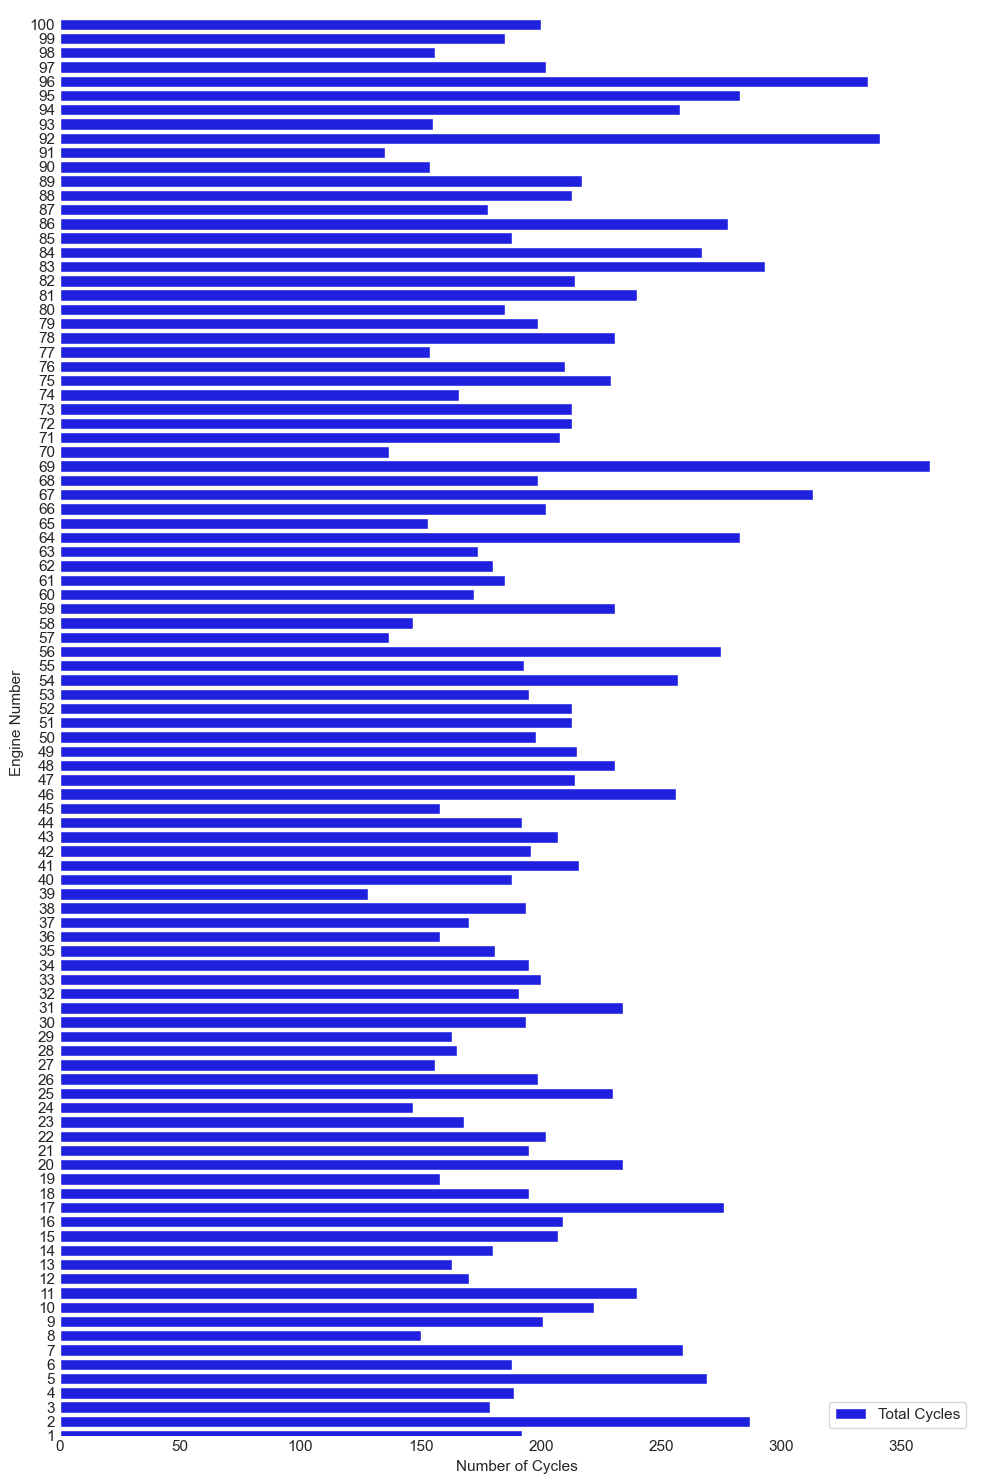

In [278]:
f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Cycle", y="Engine", data=df_train_RUL, label="Total Cycles", color="blue", orient = 'h', dodge=False)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylim=(0, 100), ylabel="",xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
ax.tick_params(labelsize=11)
ax.tick_params(length=0, axis='x')
ax.set_ylabel("Engine Number", fontsize=11)
ax.set_xlabel("Number of Cycles", fontsize=11)
plt.tight_layout()
plt.show()

In [279]:
df_train_RUL["Cycle"].mean()

206.31

The mean number of cycles after which the Turbofan Jet Engine fails is 206


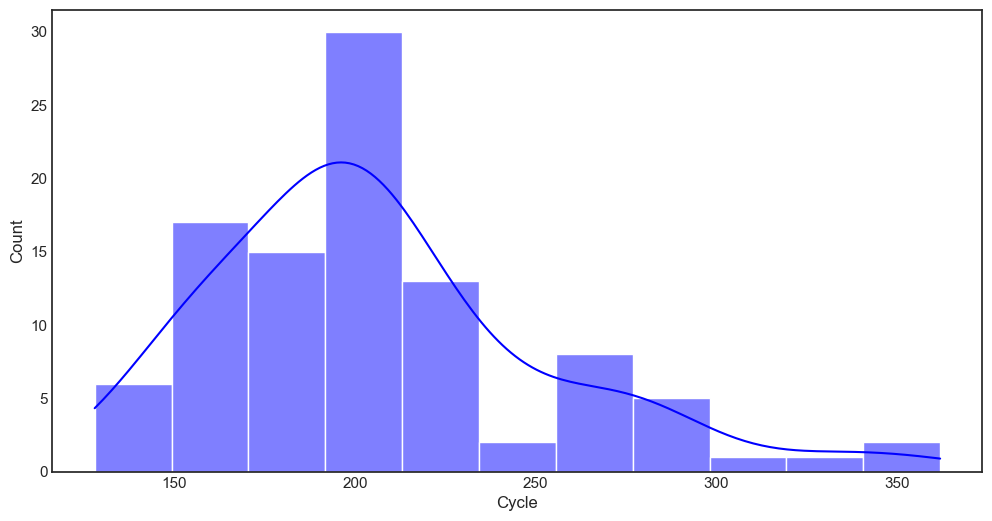

In [280]:
plt.subplots(figsize=(12, 6))
sns.histplot(df_train_RUL["Cycle"], kde = True, color='blue');
print("The mean number of cycles after which the Turbofan Jet Engine fails is "+ str(math.floor(df_train_RUL["Cycle"].mean())))

In [281]:
df_train_RUL.drop(labels="Engine",axis=1,inplace=True)
df_train_RUL.rename(columns={'Cycle':'life'},inplace=True)

In [282]:
df_train_RUL

life
Engine      
1        192
2        287
3        179
4        189
5        269
...      ...
96       336
97       202
98       156
99       185
100      200

[100 rows x 1 columns]

We find the correlations for the features

In [283]:
correlation_matrix=df_train.corr()

In [284]:
print(correlation_matrix)

                                           Engine     Cycle  Setting 1  \
Engine                                   1.000000  0.078753  -0.017895   
Cycle                                    0.078753  1.000000  -0.004527   
Setting 1                               -0.017895 -0.004527   1.000000   
Setting 2                               -0.006197  0.016132   0.011660   
Setting 3                                     NaN       NaN        NaN   
(Fan Inlet Temperature) (◦R)                  NaN       NaN        NaN   
(LPC Outlet Temperature) (◦R)            0.014133  0.549898   0.009030   
(HPC Outlet Temperature) (◦R)            0.012621  0.543947  -0.005651   
(LPT Outlet Temperature) (◦R)            0.026116  0.624577   0.009544   
(Fan Inlet Pressure) (psia)                   NaN       NaN        NaN   
(Bypass-Duct Pressure) (psia)            0.026431  0.105980  -0.001340   
(HPC Outlet Pressure) (psia)            -0.032073 -0.595914  -0.009437   
(Physical Fan Speed) (rpm)            

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

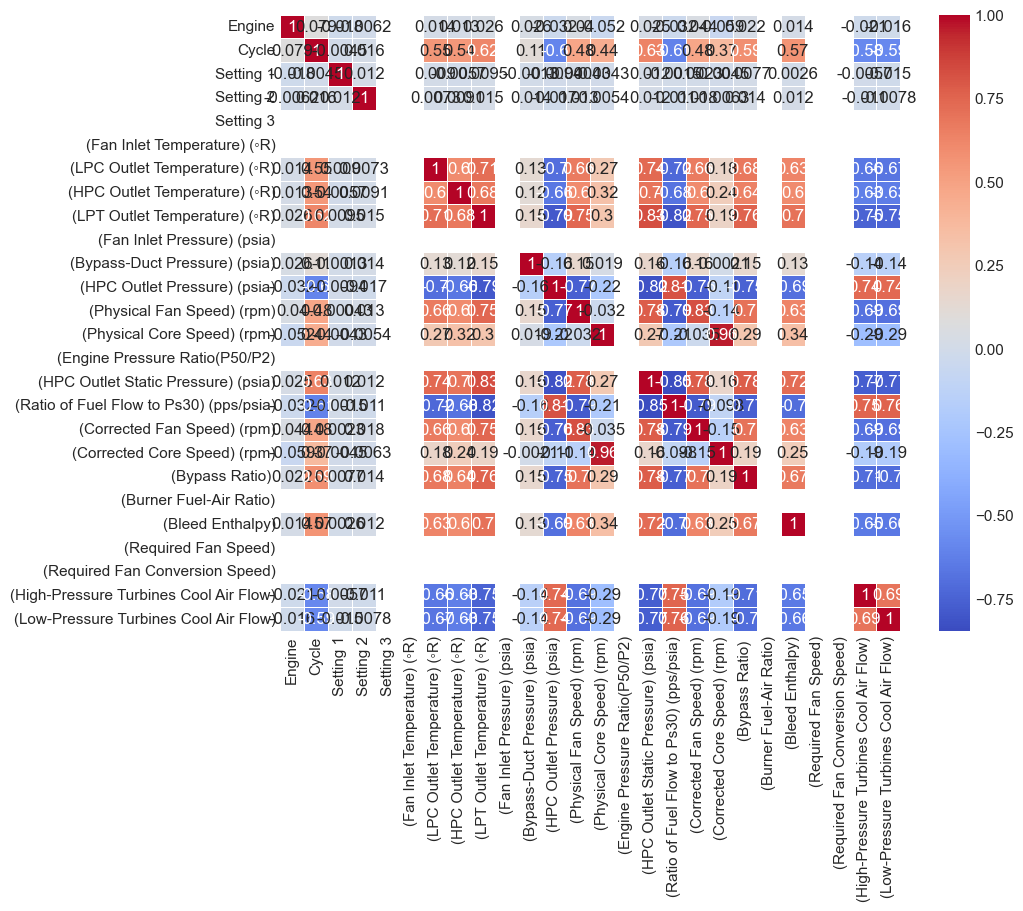

In [286]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

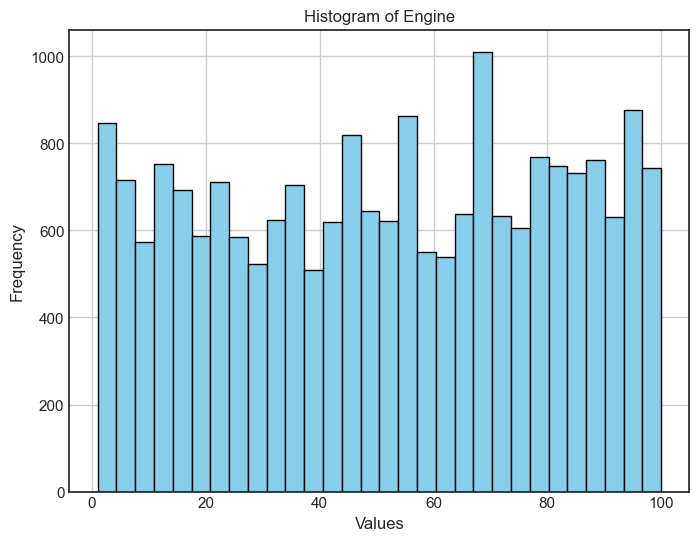

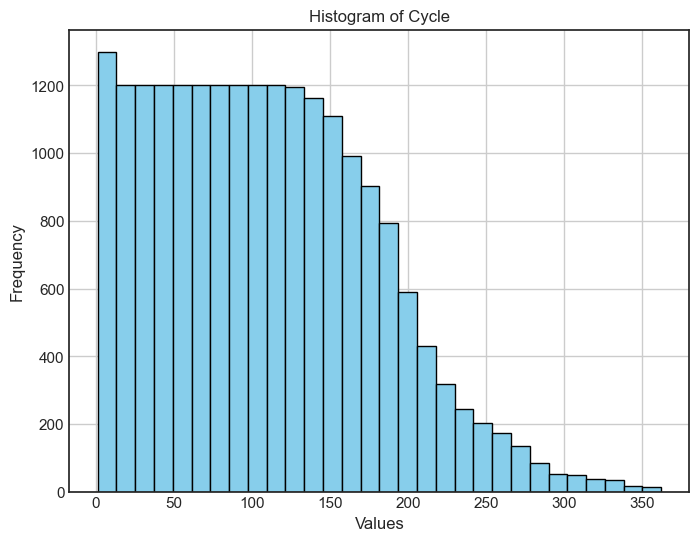

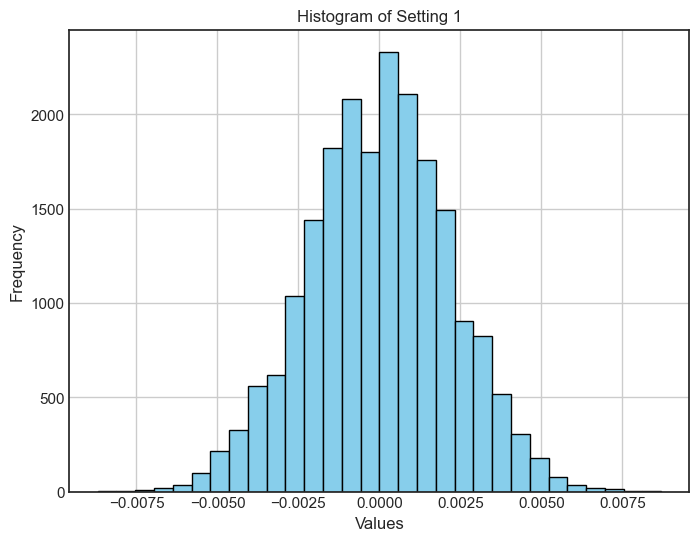

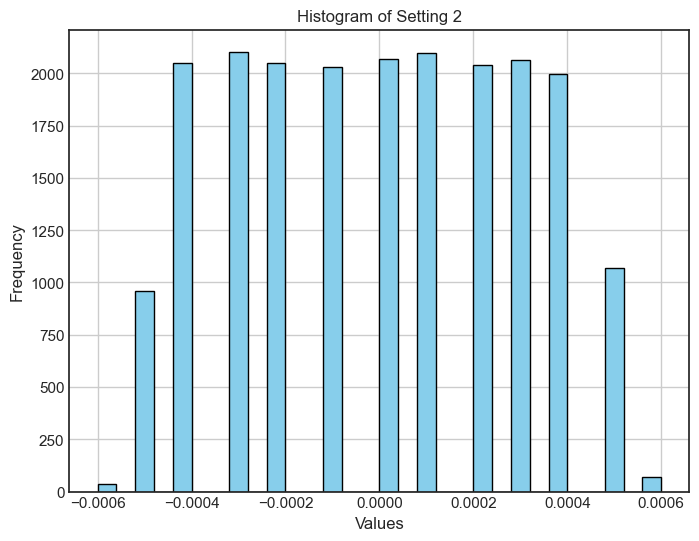

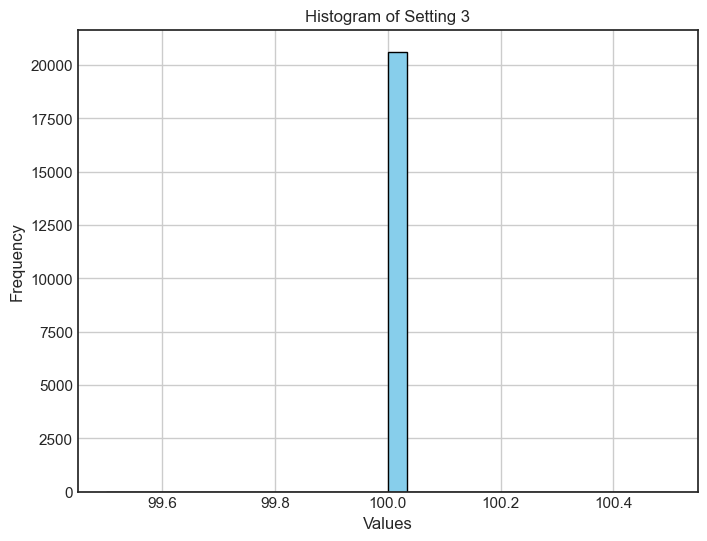

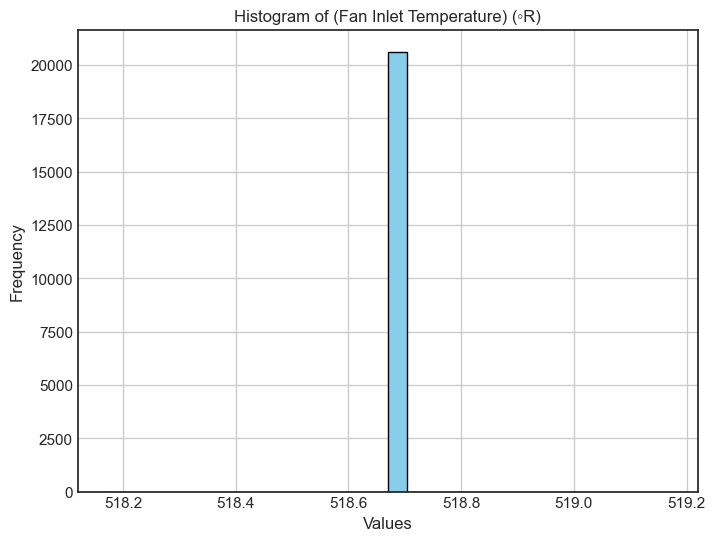

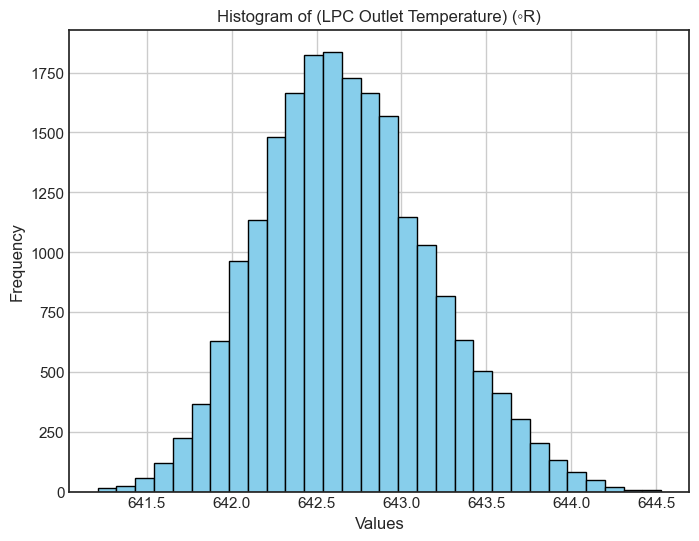

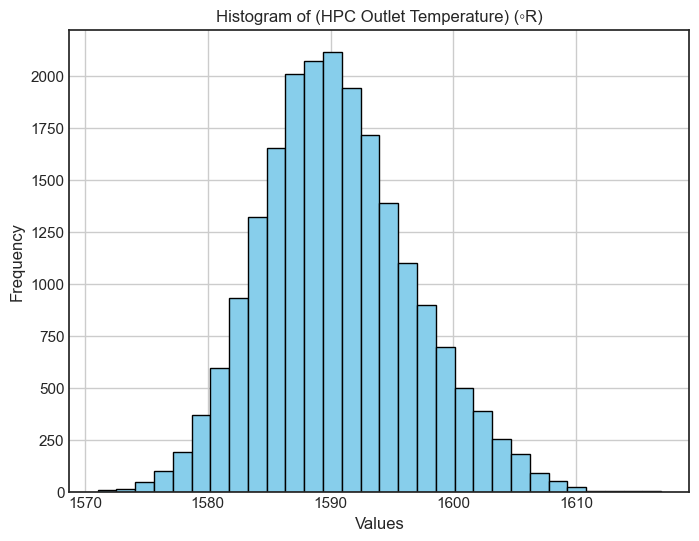

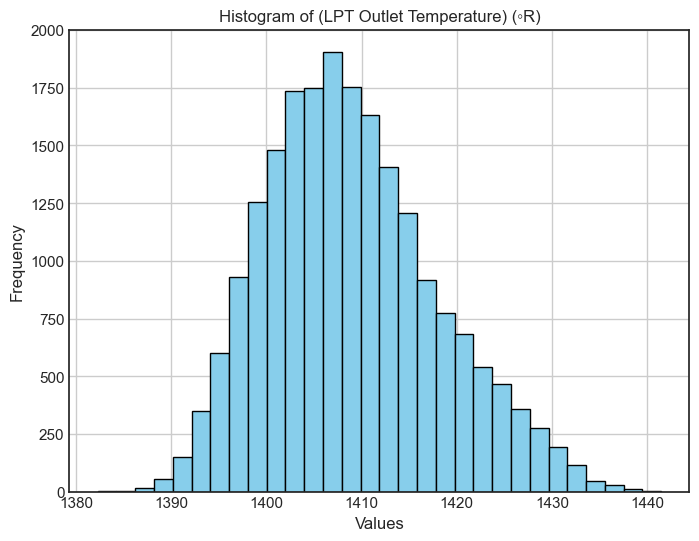

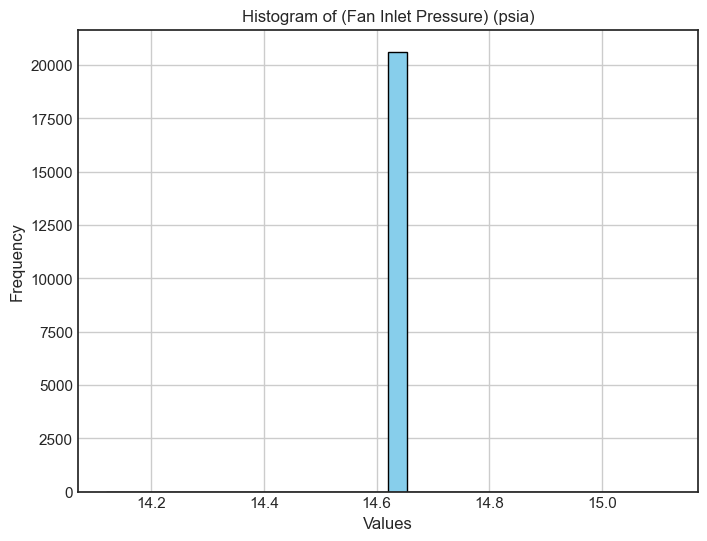

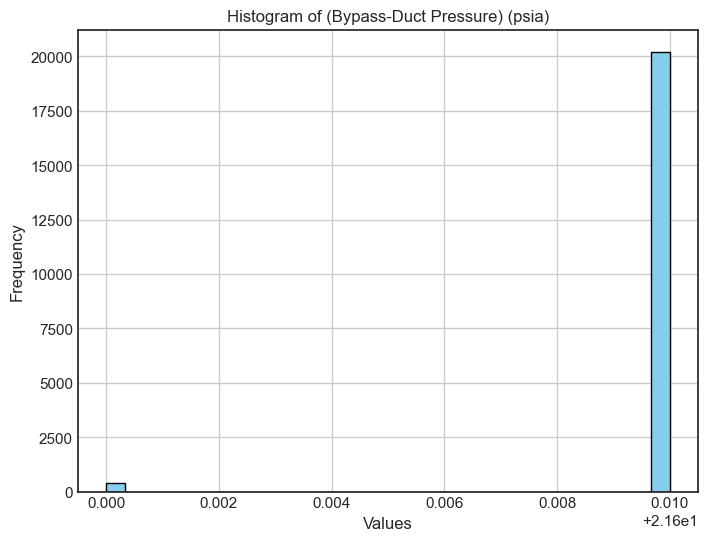

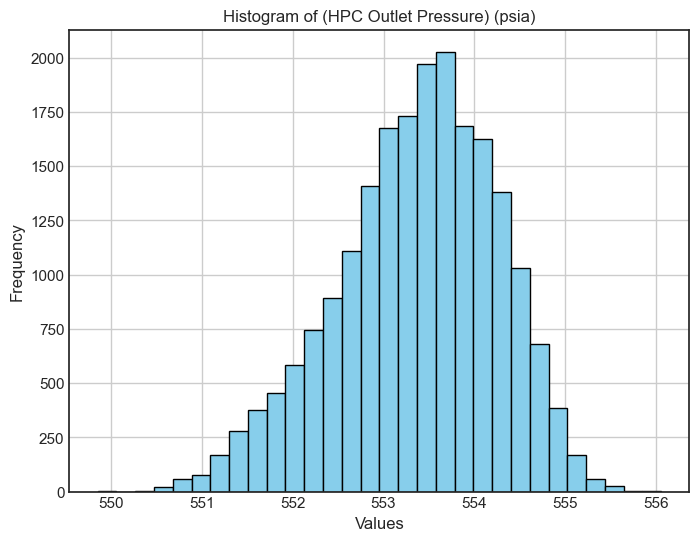

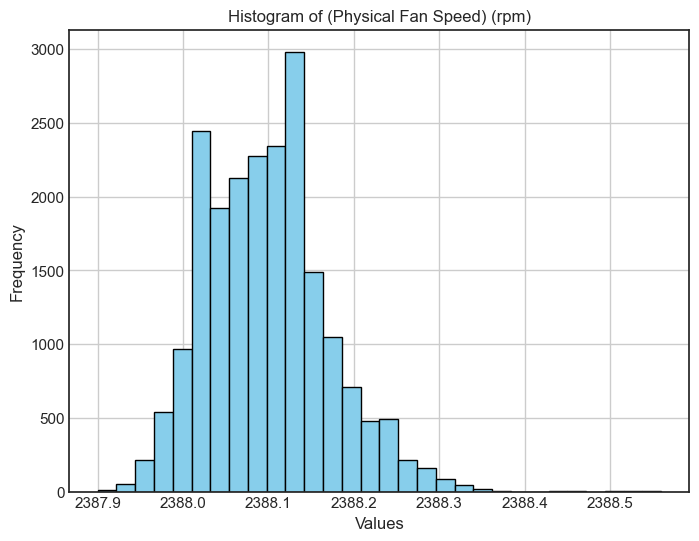

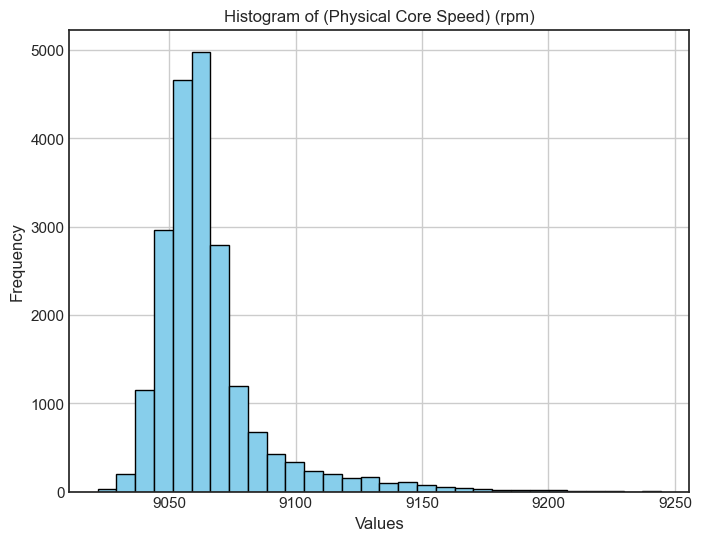

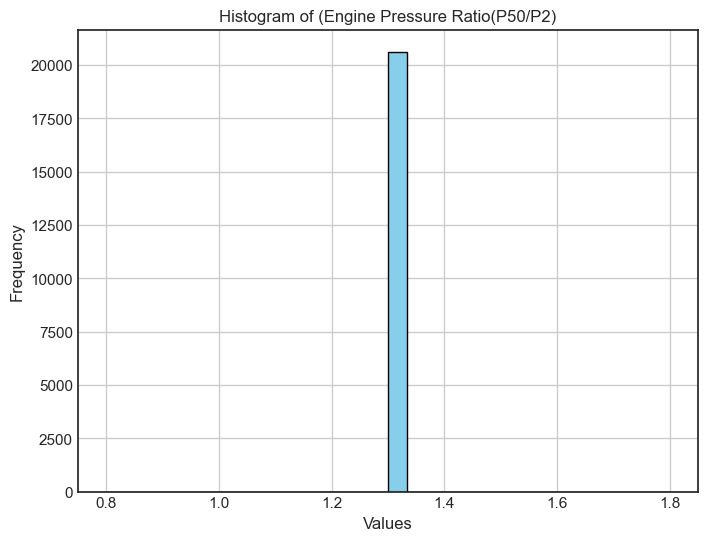

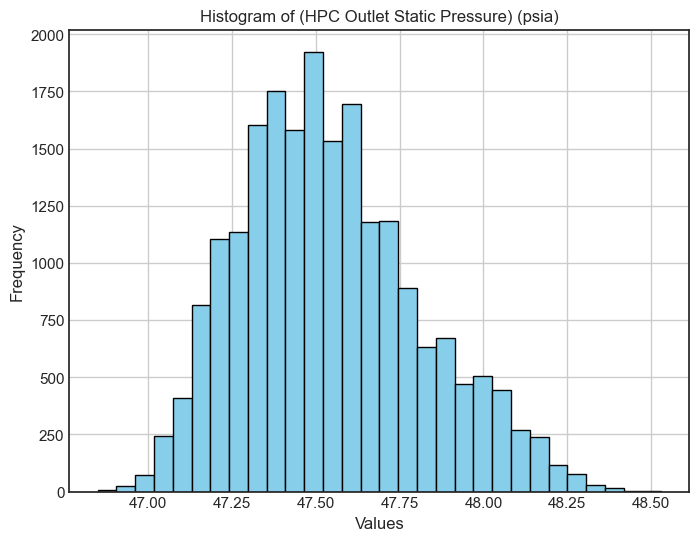

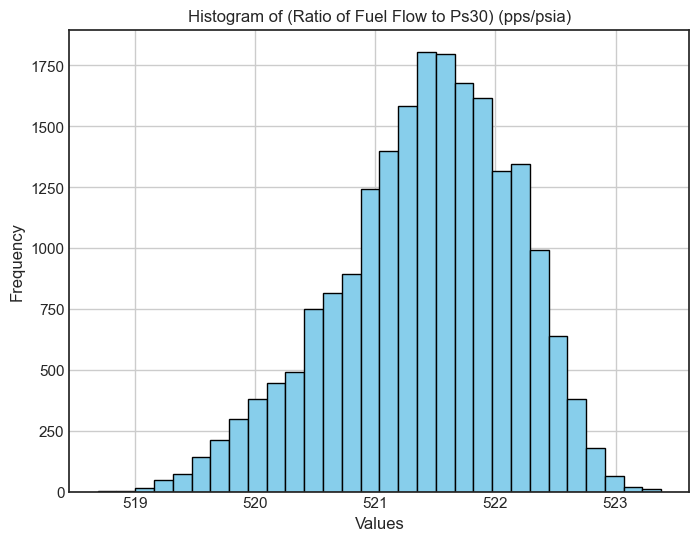

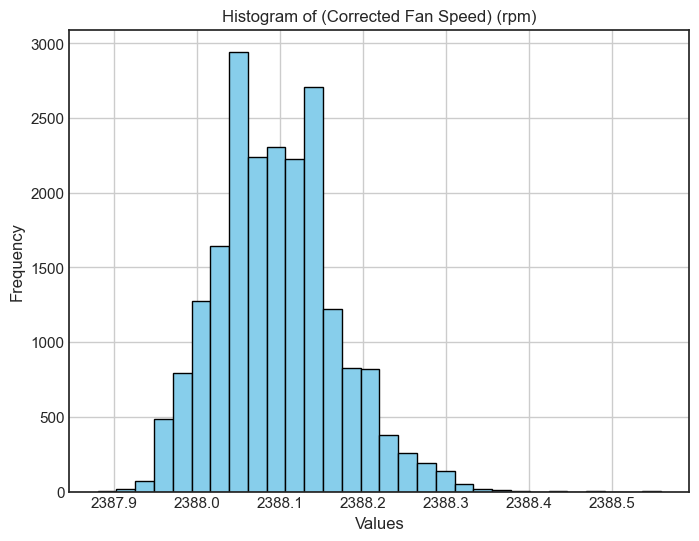

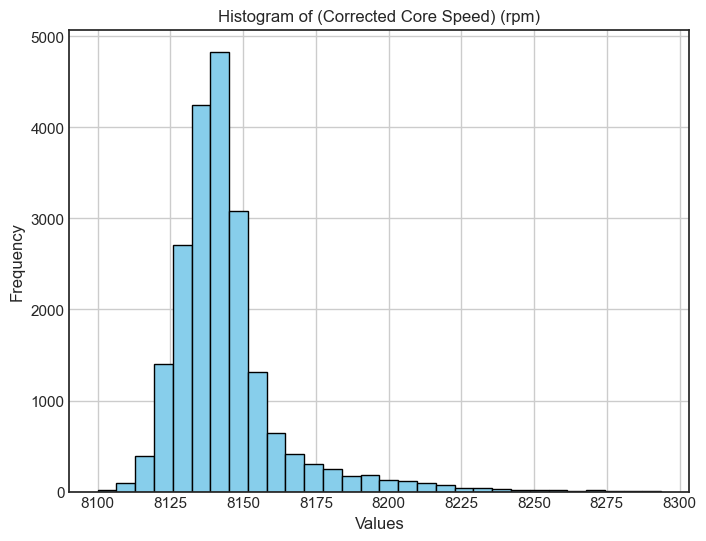

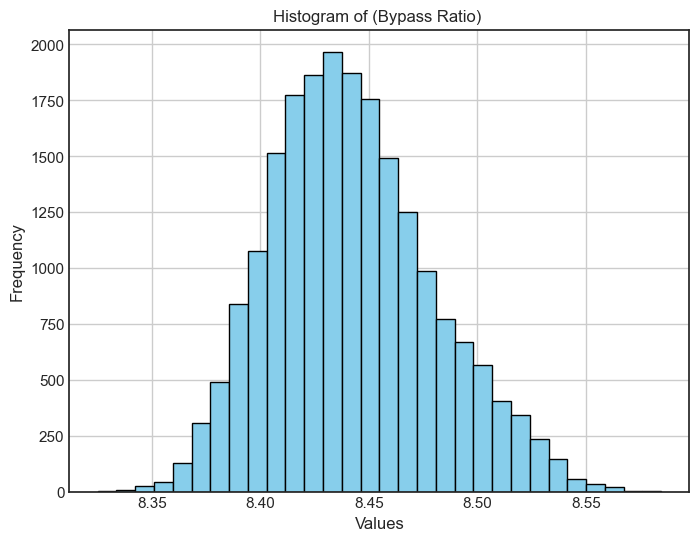

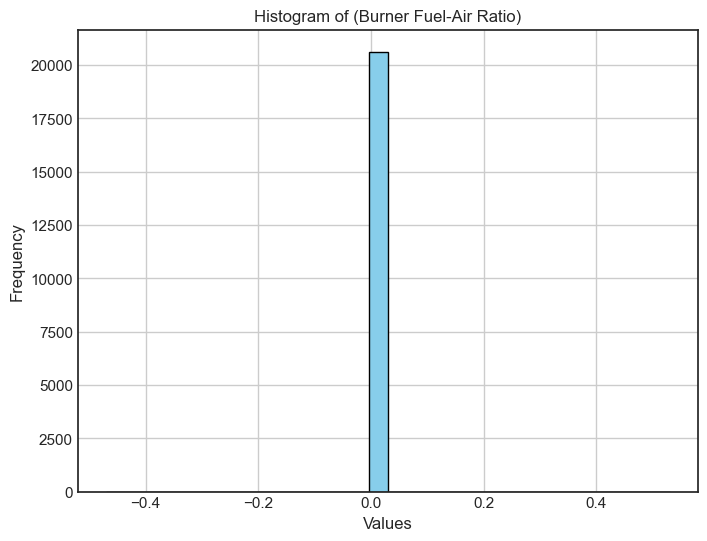

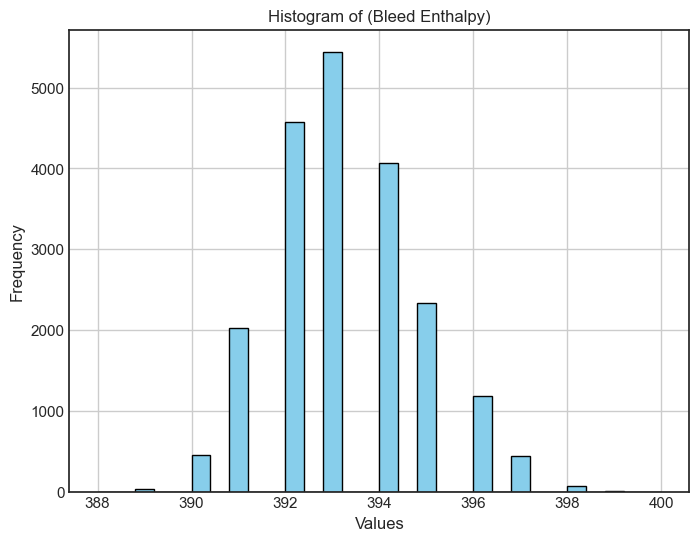

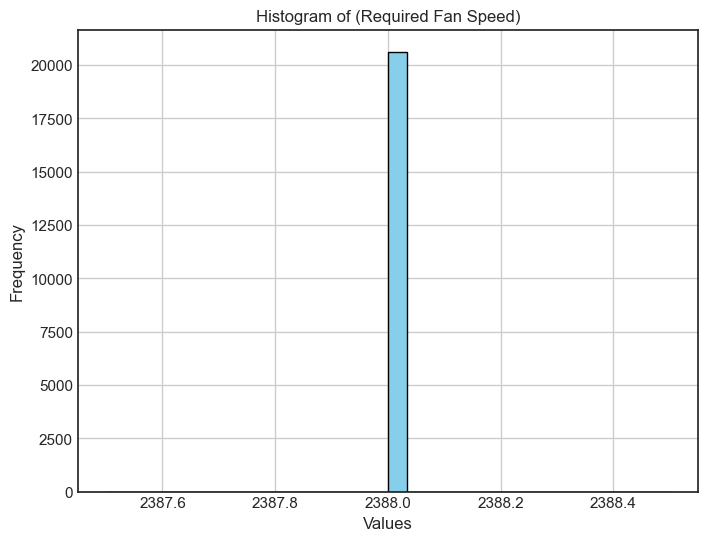

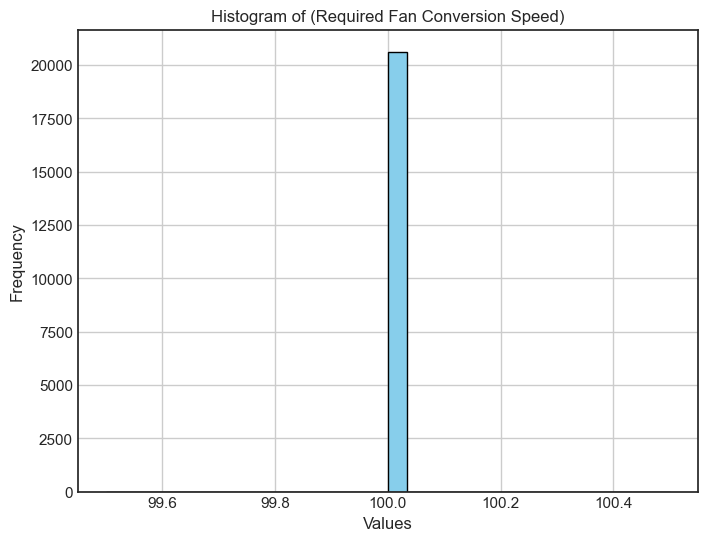

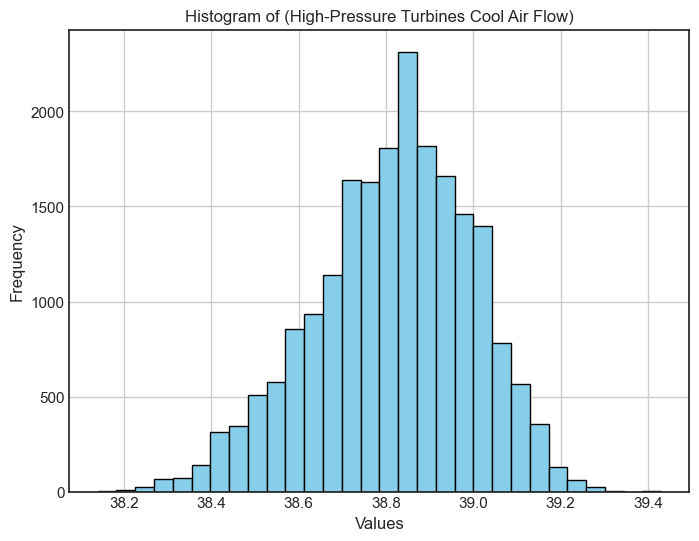

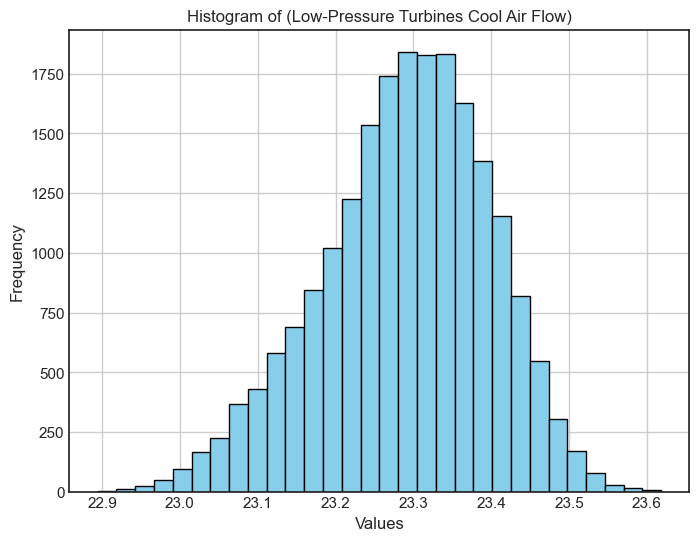

In [287]:
for column in df_train.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_train[column], bins=30, color='skyblue', edgecolor='black')  # Adjust bins, color, and edgecolor as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

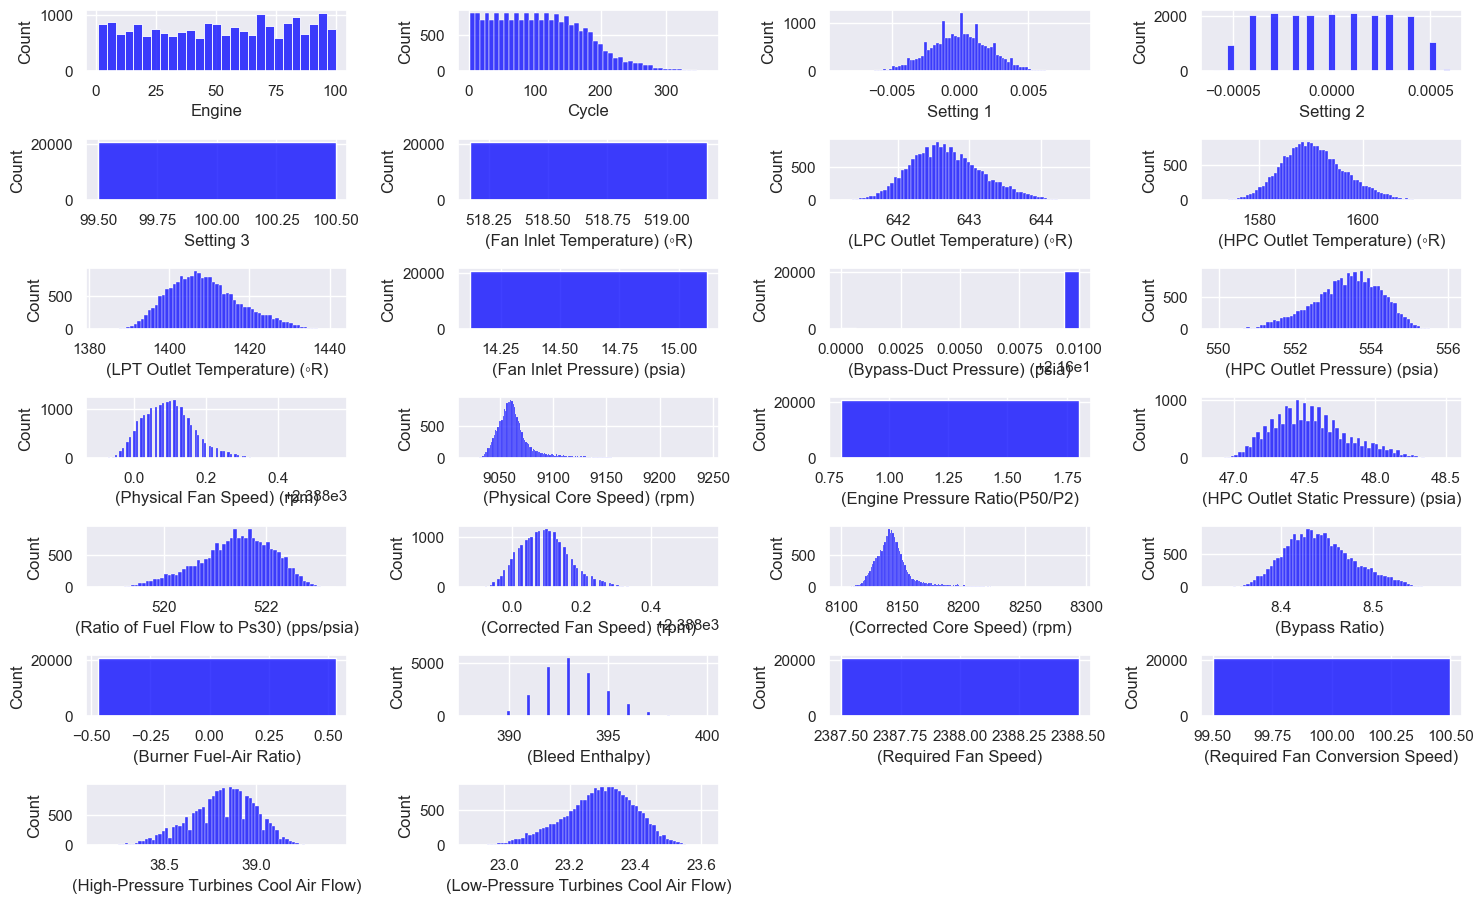

In [288]:
#Histogram representation of each sensor data

sns.set()
fig = plt.figure(figsize = [15,10])
cols = df_train.columns
cnt = 1
for col in cols :
    plt.subplot(8,4,cnt)
    sns.histplot(df_train[col],color='blue')
    cnt+=1
plt.tight_layout()
plt.show() 

### Deletion of non contributing parameters into the analysis

Using the above correlation heatmap, We can safely ignore the parameters with lesser correlation with RUL. we can infer that the following parameters are not related to the RUL.

['Setting 3', '(Fan Inlet Temperature) (◦R)', '(Fan Inlet Pressure) (psia)', '(Engine Pressure Ratio(P50/P2)', '(Burner Fuel-Air Ratio)', '(Required Fan Speed)', '(Required Fan Conversion Speed)']

sensors with constant values can be dropped as they have no predictive power



In [289]:
df_train

Engine  Cycle  Setting 1  Setting 2  Setting 3  \
0           1      1    -0.0007    -0.0004      100.0   
1           1      2     0.0019    -0.0003      100.0   
2           1      3    -0.0043     0.0003      100.0   
3           1      4     0.0007     0.0000      100.0   
4           1      5    -0.0019    -0.0002      100.0   
...       ...    ...        ...        ...        ...   
20626     100    196    -0.0004    -0.0003      100.0   
20627     100    197    -0.0016    -0.0005      100.0   
20628     100    198     0.0004     0.0000      100.0   
20629     100    199    -0.0011     0.0003      100.0   
20630     100    200    -0.0032    -0.0005      100.0   

       (Fan Inlet Temperature) (◦R)  (LPC Outlet Temperature) (◦R)  \
0                            518.67                         641.82   
1                            518.67                         642.15   
2                            518.67                         642.35   
3                            518.67                         642.35   
4                            518.67                         642.37   
...                             ...                            ...   
20626                        518.67                         643.49   
20627                        518.67                         643.54   
20628                        518.67                         643.42   
20629                        518.67                         643.23   
20630                        518.67                         643.85   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                            1589.70                        1400.60   
1                            1591.82                        1403.14   
2                            1587.99                        1404.20   
3                            1582.79                        1401.87   
4                            1582.85                        1406.22   
...                              ...                            ...   
20626                        1597.98                        1428.63   
20627                        1604.50                        1433.58   
20628                        1602.46                        1428.18   
20629                        1605.26                        1426.53   
20630                        1600.38                        1432.14   

       (Fan Inlet Pressure) (psia)  ...  \
0                            14.62  ...   
1                            14.62  ...   
2                            14.62  ...   
3                            14.62  ...   
4                            14.62  ...   
...                            ...  ...   
20626                        14.62  ...   
20627                        14.62  ...   
20628                        14.62  ...   
20629                        14.62  ...   
20630                        14.62  ...   

       (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                       521.66                      2388.02   
1                                       522.28                      2388.07   
2                                       522.42                      2388.03   
3                                       522.86                      2388.08   
4                                       522.19                      2388.04   
...                                        ...                          ...   
20626                                   519.49                      2388.26   
20627                                   519.68                      2388.22   
20628                                   520.01                      2388.24   
20629                                   519.67                      2388.23   
20630                                   519.30                      2388.26   

       (Corrected Core Speed) (rpm)  (Bypass Ratio)   (Burner Fuel-Air Ratio)  \
0                           8138.62           8.4195                     0.03   


In [290]:
# drop the sensors wiith constant values
sens_const_values = []
for feature in df_train.columns.tolist():
    if df_train[feature].min()==df_train[feature].max():
            sens_const_values.append(feature)
    else:
        continue

print(sens_const_values)


['Setting 3', '(Fan Inlet Temperature) (◦R)', '(Fan Inlet Pressure) (psia)', '(Engine Pressure Ratio(P50/P2)', '(Burner Fuel-Air Ratio)', '(Required Fan Speed)', '(Required Fan Conversion Speed)']


In [291]:
df_train.drop(columns=sens_const_values, inplace=True)
df_test.drop(columns=sens_const_values, inplace=True)

In [292]:
df_train.drop(labels = ["Setting 1", "Setting 2","(Bypass-Duct Pressure) (psia)"], axis=1, inplace=True)
df_test.drop(labels = ["Setting 1", "Setting 2","(Bypass-Duct Pressure) (psia)"], axis=1, inplace=True)

In [293]:
df_train.shape

(20631, 16)

In [294]:
df_train

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0           1      1                         641.82   
1           1      2                         642.15   
2           1      3                         642.35   
3           1      4                         642.35   
4           1      5                         642.37   
...       ...    ...                            ...   
20626     100    196                         643.49   
20627     100    197                         643.54   
20628     100    198                         643.42   
20629     100    199                         643.23   
20630     100    200                         643.85   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                            1589.70                        1400.60   
1                            1591.82                        1403.14   
2                            1587.99                        1404.20   
3                            1582.79                        1401.87   
4                            1582.85                        1406.22   
...                              ...                            ...   
20626                        1597.98                        1428.63   
20627                        1604.50                        1433.58   
20628                        1602.46                        1428.18   
20629                        1605.26                        1426.53   
20630                        1600.38                        1432.14   

       (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                            554.36                     2388.06   
1                            553.75                     2388.04   
2                            554.26                     2388.08   
3                            554.45                     2388.11   
4                            554.00                     2388.06   
...                             ...                         ...   
20626                        551.43                     2388.19   
20627                        550.86                     2388.23   
20628                        550.94                     2388.24   
20629                        550.68                     2388.25   
20630                        550.79                     2388.26   

       (Physical Core Speed) (rpm)  (HPC Outlet Static Pressure) (psia)  \
0                          9046.19                                47.47   
1                          9044.07                                47.49   
2                          9052.94                                47.27   
3                          9049.48                                47.13   
4                          9055.15                                47.28   
...                            ...                                  ...   
20626                      9065.52                                48.07   
20627                      9065.11                                48.04   
20628                      9065.90                                48.09   
20629                      9073.72                                48.39   
20630                      9061.48                                48.20   

       (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                       521.66                      2388.02   
1                                       522.28                      2388.07   
2                                       522.42                      2388.03   
3                                       522.86                      2388.08   
4                                       522.19                      2388.04   
...                                        ...                          ...   
20626                                   519.49                      2388.26   
20627                                   519.68                      2388.22   
20628                                   520.01                      2388.24 

In [295]:
df_test.shape

(13096, 16)

In [296]:
df_test

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0           1      1                         643.02   
1           1      2                         641.71   
2           1      3                         642.46   
3           1      4                         642.44   
4           1      5                         642.51   
...       ...    ...                            ...   
13091     100    194                         643.24   
13092     100    195                         643.22   
13093     100    196                         643.44   
13094     100    197                         643.26   
13095     100    198                         642.95   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                            1585.29                        1398.21   
1                            1588.45                        1395.42   
2                            1586.94                        1401.34   
3                            1584.12                        1406.42   
4                            1587.19                        1401.92   
...                              ...                            ...   
13091                        1599.45                        1415.79   
13092                        1595.69                        1422.05   
13093                        1593.15                        1406.82   
13094                        1594.99                        1419.36   
13095                        1601.62                        1424.99   

       (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                            553.90                     2388.04   
1                            554.85                     2388.01   
2                            554.11                     2388.05   
3                            554.07                     2388.03   
4                            554.16                     2388.01   
...                             ...                         ...   
13091                        553.41                     2388.02   
13092                        553.22                     2388.05   
13093                        553.04                     2388.11   
13094                        553.37                     2388.07   
13095                        552.48                     2388.06   

       (Physical Core Speed) (rpm)  (HPC Outlet Static Pressure) (psia)  \
0                          9050.17                                47.20   
1                          9054.42                                47.50   
2                          9056.96                                47.50   
3                          9045.29                                47.28   
4                          9044.55                                47.31   
...                            ...                                  ...   
13091                      9142.37                                47.69   
13092                      9140.68                                47.60   
13093                      9146.81                                47.57   
13094                      9148.85                                47.61   
13095                      9155.03                                47.80   

       (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                       521.72                      2388.03   
1                                       522.16                      2388.06   
2                                       521.97                      2388.03   
3                                       521.38                      2388.05   
4                                       522.15                      2388.03   
...                                        ...                          ...   
13091                                   520.69                      2388.00   
13092                                   521.05                      2388.09   
13093                                   521.18                      2388.04 

Add the RUL as a target feature to the data



In [297]:
df_train_RUL = df_train.groupby(['Engine'])[["Cycle"]].max()
df_train_RUL.rename(columns={'Cycle':'life'},inplace=True)
df_train_RUL.head()

life
Engine      
1        192
2        287
3        179
4        189
5        269

In [298]:
df_train=df_train.merge(df_train_RUL,how='left',on=['Engine'])


In [299]:
df_train['RUL']=df_train['life']-df_train['Cycle']
df_train.drop(['life'],axis=1,inplace=True)

In [300]:
df_train

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0           1      1                         641.82   
1           1      2                         642.15   
2           1      3                         642.35   
3           1      4                         642.35   
4           1      5                         642.37   
...       ...    ...                            ...   
20626     100    196                         643.49   
20627     100    197                         643.54   
20628     100    198                         643.42   
20629     100    199                         643.23   
20630     100    200                         643.85   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                            1589.70                        1400.60   
1                            1591.82                        1403.14   
2                            1587.99                        1404.20   
3                            1582.79                        1401.87   
4                            1582.85                        1406.22   
...                              ...                            ...   
20626                        1597.98                        1428.63   
20627                        1604.50                        1433.58   
20628                        1602.46                        1428.18   
20629                        1605.26                        1426.53   
20630                        1600.38                        1432.14   

       (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                            554.36                     2388.06   
1                            553.75                     2388.04   
2                            554.26                     2388.08   
3                            554.45                     2388.11   
4                            554.00                     2388.06   
...                             ...                         ...   
20626                        551.43                     2388.19   
20627                        550.86                     2388.23   
20628                        550.94                     2388.24   
20629                        550.68                     2388.25   
20630                        550.79                     2388.26   

       (Physical Core Speed) (rpm)  (HPC Outlet Static Pressure) (psia)  \
0                          9046.19                                47.47   
1                          9044.07                                47.49   
2                          9052.94                                47.27   
3                          9049.48                                47.13   
4                          9055.15                                47.28   
...                            ...                                  ...   
20626                      9065.52                                48.07   
20627                      9065.11                                48.04   
20628                      9065.90                                48.09   
20629                      9073.72                                48.39   
20630                      9061.48                                48.20   

       (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                       521.66                      2388.02   
1                                       522.28                      2388.07   
2                                       522.42                      2388.03   
3                                       522.86                      2388.08   
4                                       522.19                      2388.04   
...                                        ...                          ...   
20626                                   519.49                      2388.26   
20627                                   519.68                      2388.22   
20628                                   520.01                      2388.24 

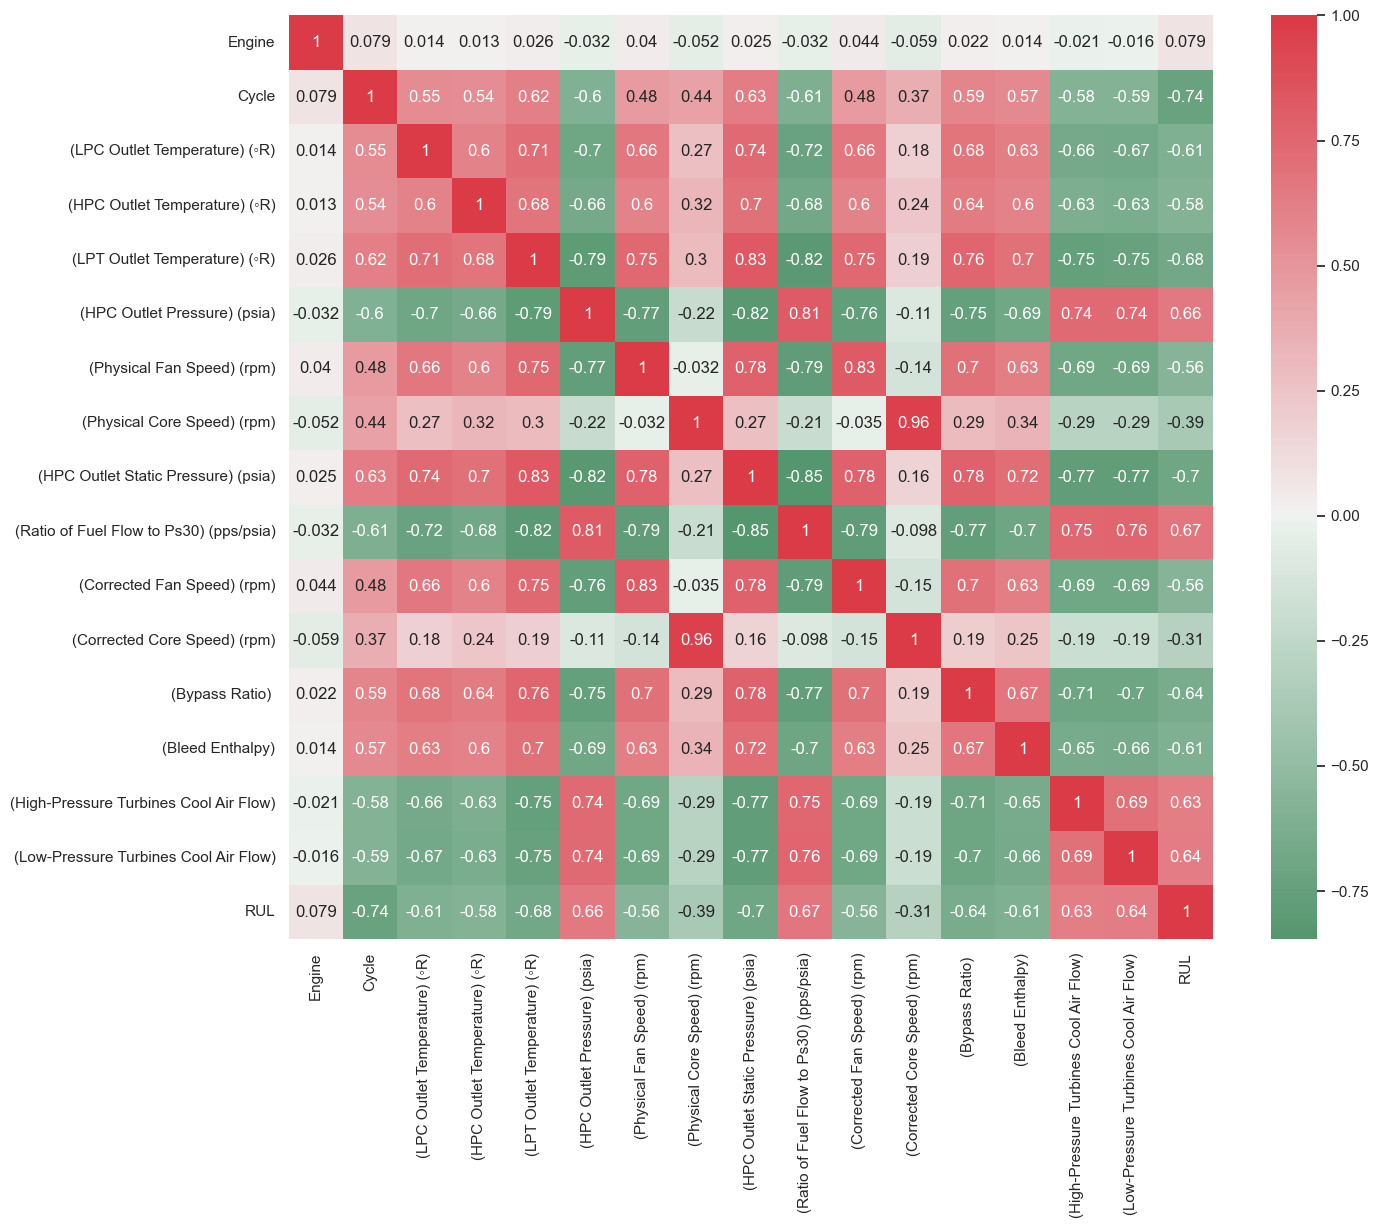

In [301]:
plt.figure(figsize=(15, 12))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(df_train.corr(), cmap =cmap, center=0, annot=True, square=True);

visulize the relationship between each features and RUL

In [302]:
def plot_feature(feature_name,X):
    plt.figure(figsize=(13,5))
    for i in X['Engine'].unique():
        if (i % 10 == 0):  # only plot every engine
            plt.plot('RUL', feature_name, 
                     data=X[X['Engine']==i].rolling(8).mean())
            plt.axvline(30, color='red', linestyle='dashed', linewidth=2)
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(feature_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

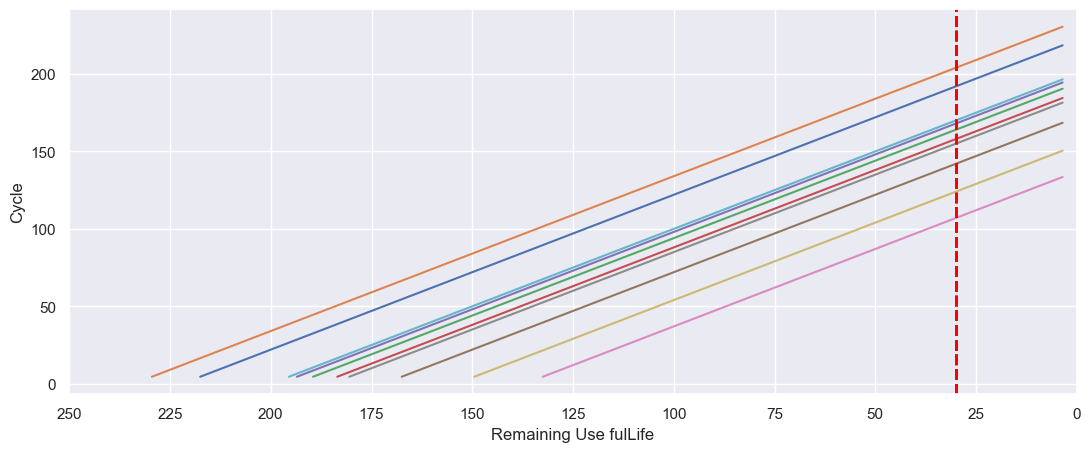

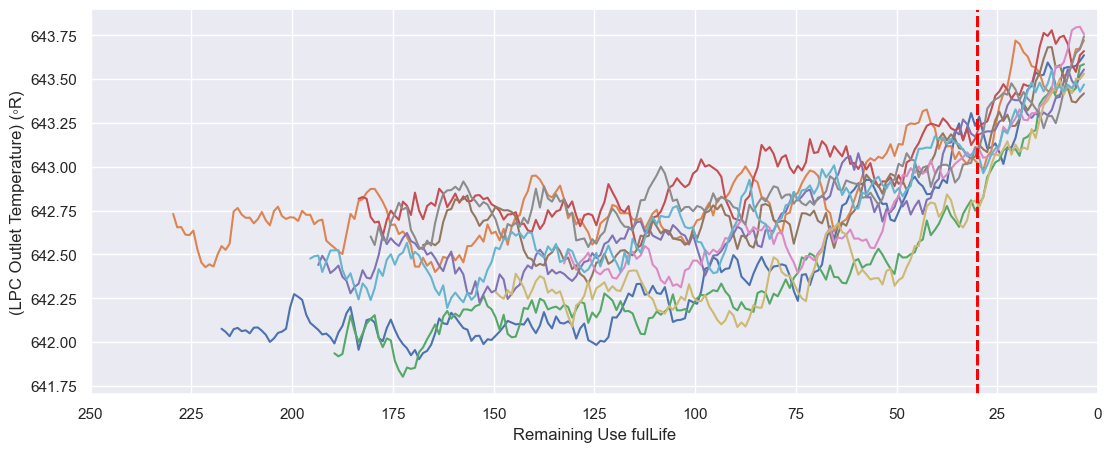

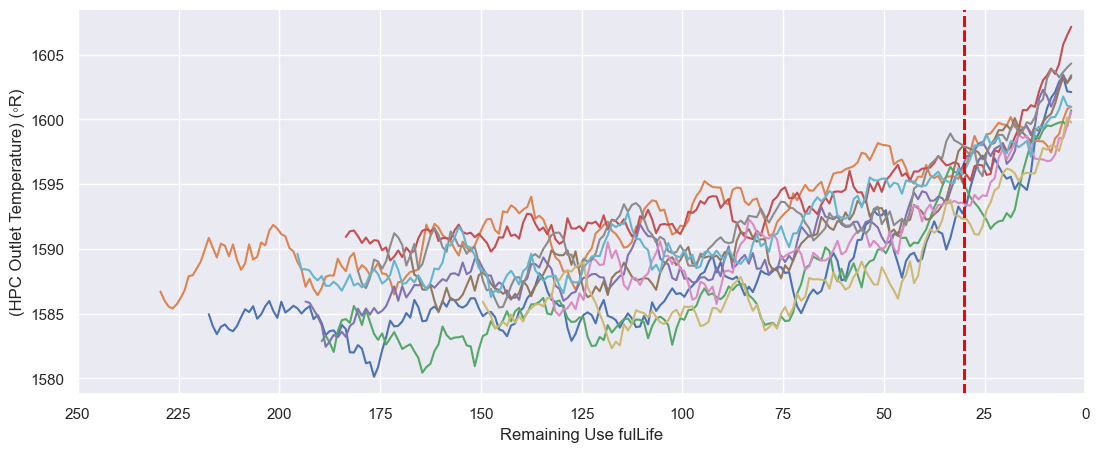

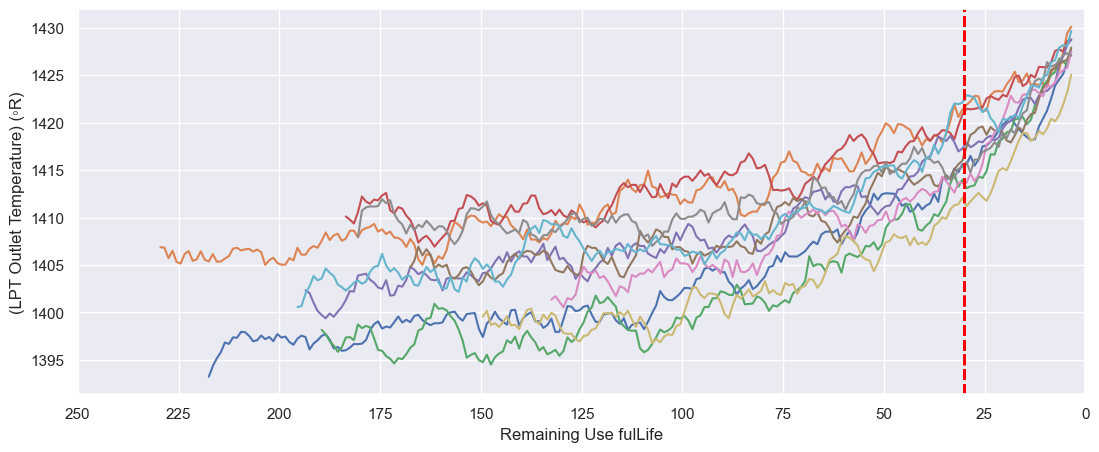

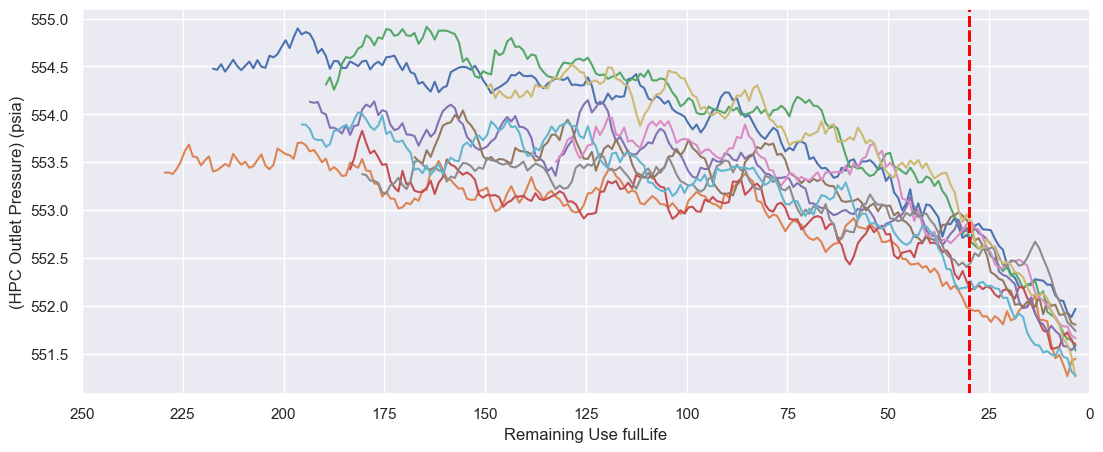

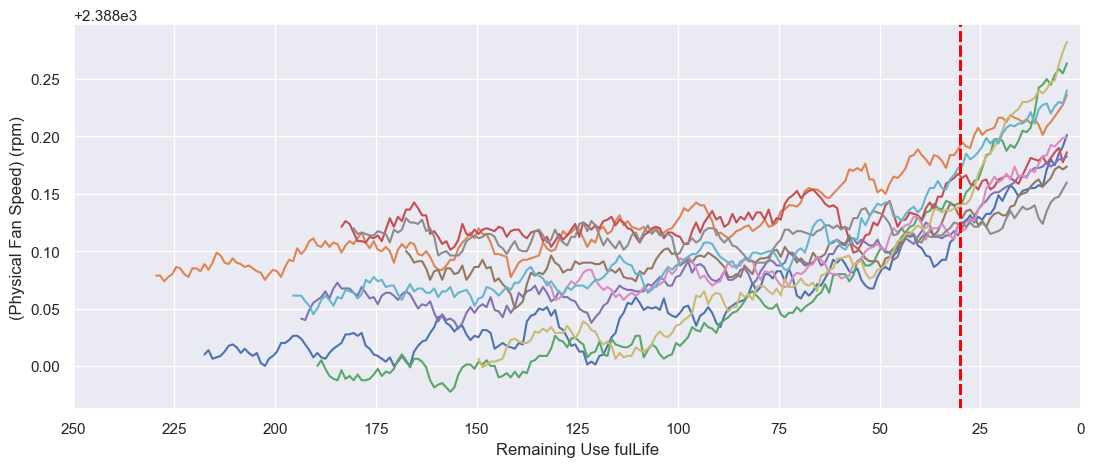

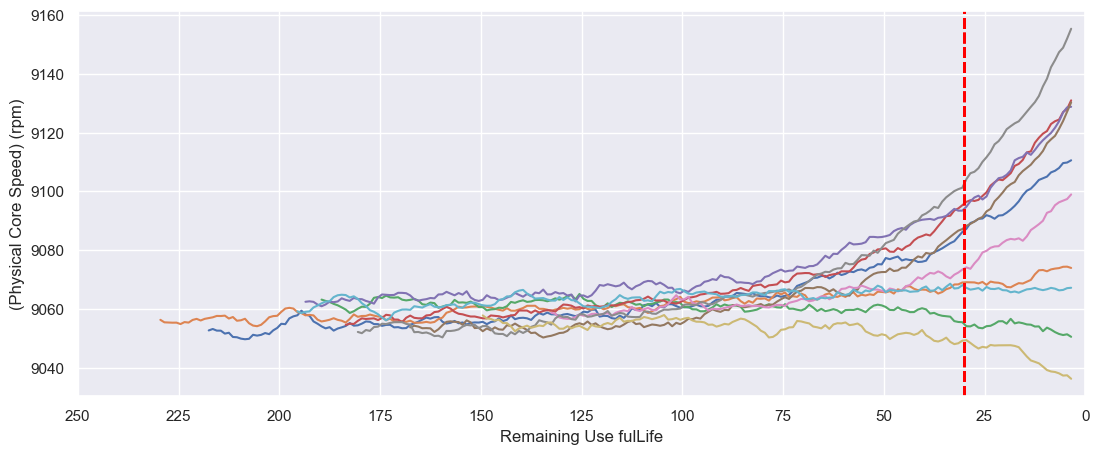

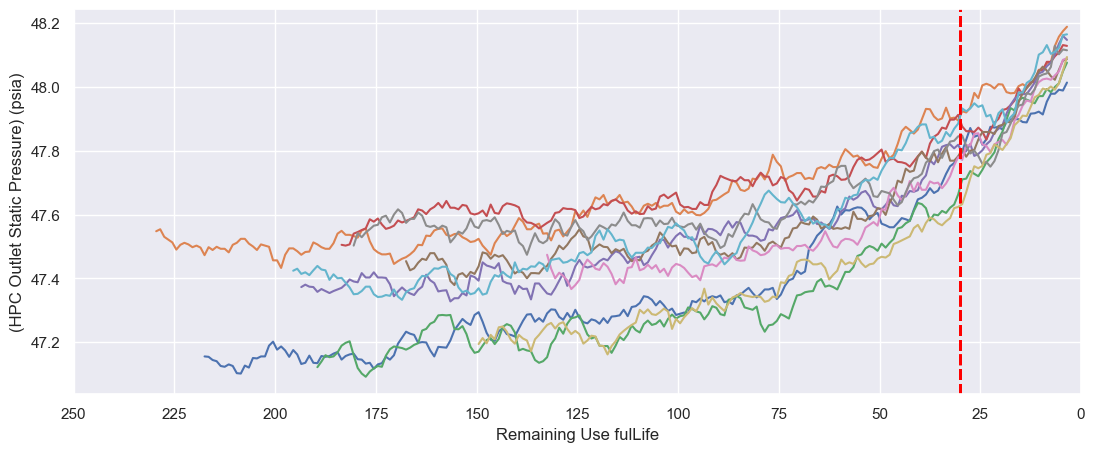

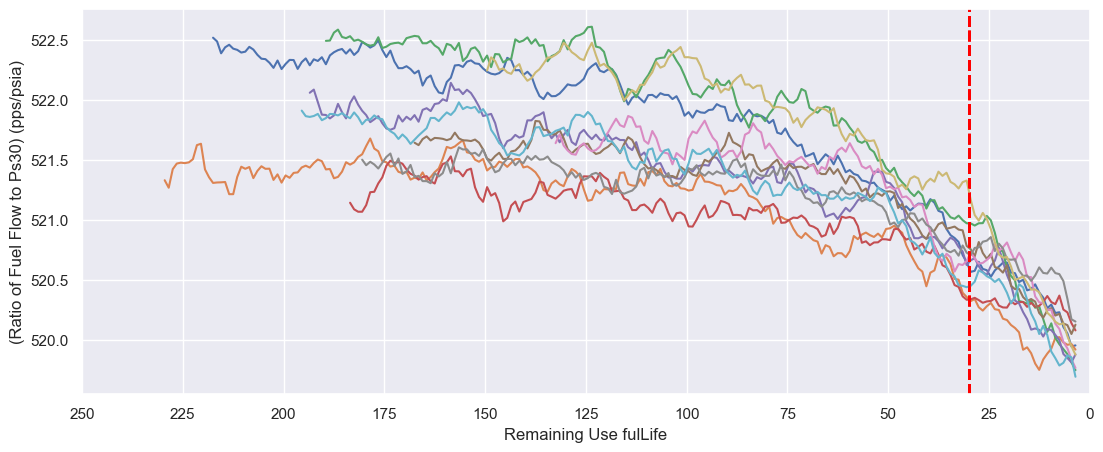

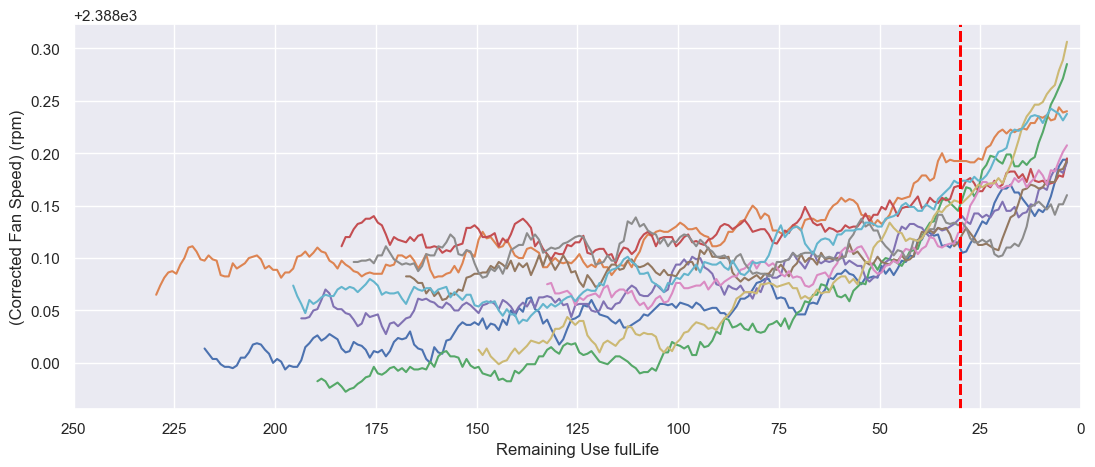

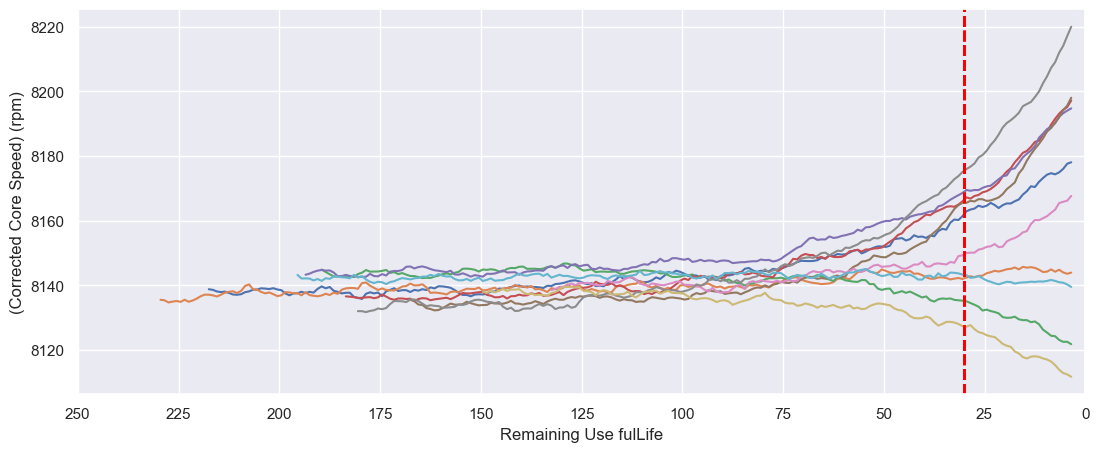

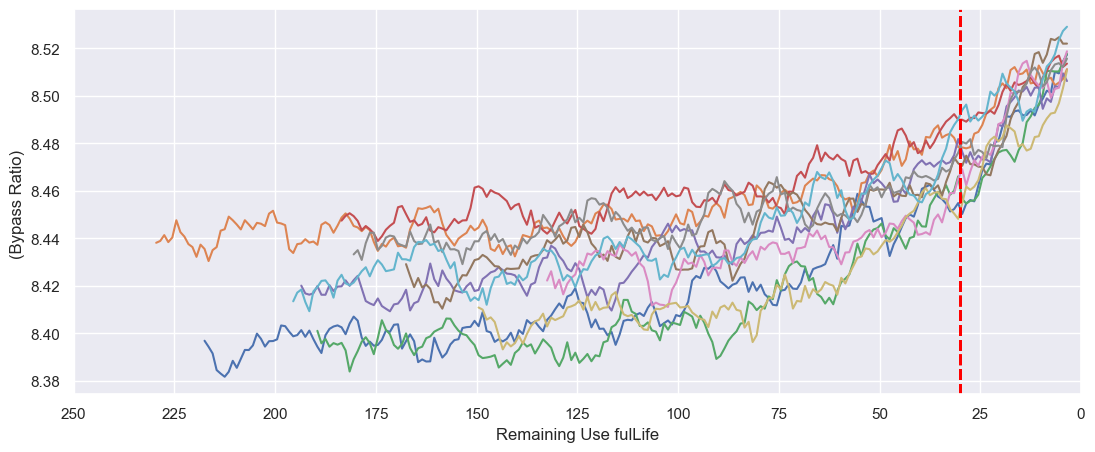

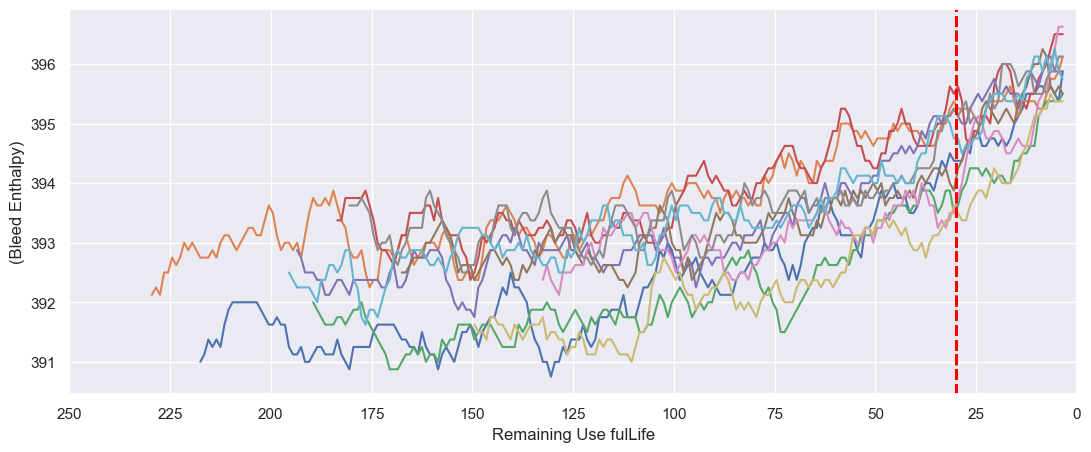

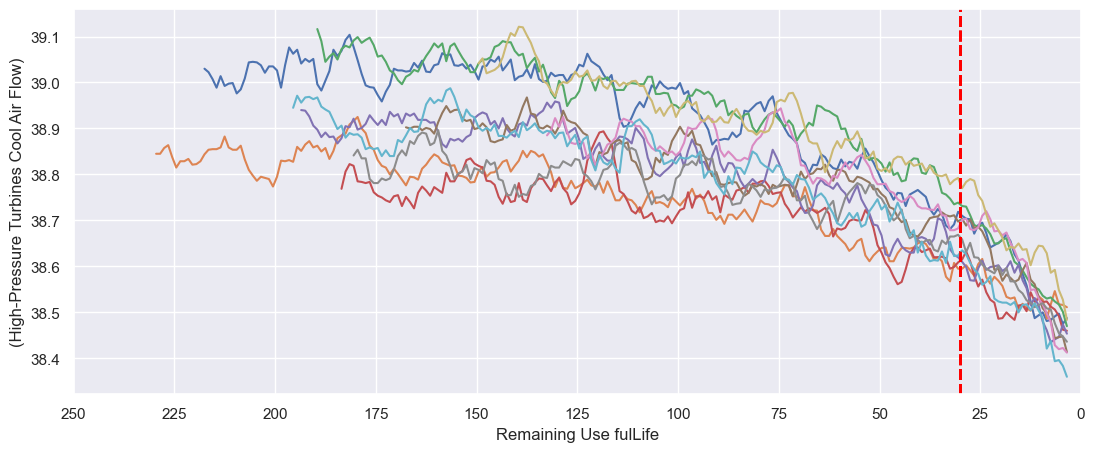

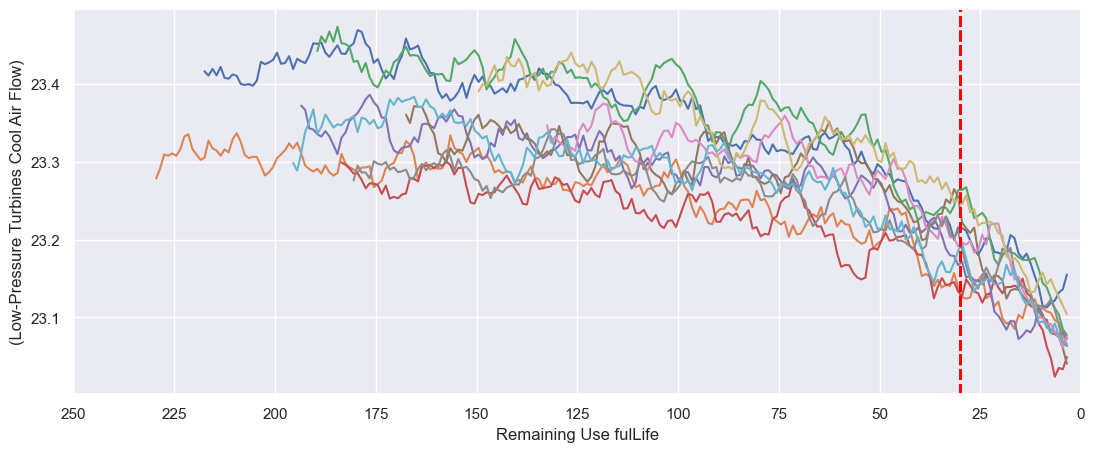

In [303]:
for feature in df_train.drop(['Engine', 'RUL'], axis=1).columns:
    plot_feature(feature, df_train)

In [304]:
# Based on the above data variation, we removed sensor 9
df_train.drop(labels =["(Physical Core Speed) (rpm)","(Corrected Core Speed) (rpm)"], axis=1, inplace=True)


In [305]:
df_train

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0           1      1                         641.82   
1           1      2                         642.15   
2           1      3                         642.35   
3           1      4                         642.35   
4           1      5                         642.37   
...       ...    ...                            ...   
20626     100    196                         643.49   
20627     100    197                         643.54   
20628     100    198                         643.42   
20629     100    199                         643.23   
20630     100    200                         643.85   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                            1589.70                        1400.60   
1                            1591.82                        1403.14   
2                            1587.99                        1404.20   
3                            1582.79                        1401.87   
4                            1582.85                        1406.22   
...                              ...                            ...   
20626                        1597.98                        1428.63   
20627                        1604.50                        1433.58   
20628                        1602.46                        1428.18   
20629                        1605.26                        1426.53   
20630                        1600.38                        1432.14   

       (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                            554.36                     2388.06   
1                            553.75                     2388.04   
2                            554.26                     2388.08   
3                            554.45                     2388.11   
4                            554.00                     2388.06   
...                             ...                         ...   
20626                        551.43                     2388.19   
20627                        550.86                     2388.23   
20628                        550.94                     2388.24   
20629                        550.68                     2388.25   
20630                        550.79                     2388.26   

       (HPC Outlet Static Pressure) (psia)  \
0                                    47.47   
1                                    47.49   
2                                    47.27   
3                                    47.13   
4                                    47.28   
...                                    ...   
20626                                48.07   
20627                                48.04   
20628                                48.09   
20629                                48.39   
20630                                48.20   

       (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                       521.66                      2388.02   
1                                       522.28                      2388.07   
2                                       522.42                      2388.03   
3                                       522.86                      2388.08   
4                                       522.19                      2388.04   
...                                        ...                          ...   
20626                                   519.49                      2388.26   
20627                                   519.68                      2388.22   
20628                                   520.01                      2388.24   
20629                                   519.67                      2388.23   
20630                                   519.30                      2388.26   

       (Bypass Ratio)   (Bleed Enthalpy)  \
0               8.4195               392   
1               8.4318               392   
2               8.4178               390   
3         

In [306]:
df_test

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0           1      1                         643.02   
1           1      2                         641.71   
2           1      3                         642.46   
3           1      4                         642.44   
4           1      5                         642.51   
...       ...    ...                            ...   
13091     100    194                         643.24   
13092     100    195                         643.22   
13093     100    196                         643.44   
13094     100    197                         643.26   
13095     100    198                         642.95   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                            1585.29                        1398.21   
1                            1588.45                        1395.42   
2                            1586.94                        1401.34   
3                            1584.12                        1406.42   
4                            1587.19                        1401.92   
...                              ...                            ...   
13091                        1599.45                        1415.79   
13092                        1595.69                        1422.05   
13093                        1593.15                        1406.82   
13094                        1594.99                        1419.36   
13095                        1601.62                        1424.99   

       (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                            553.90                     2388.04   
1                            554.85                     2388.01   
2                            554.11                     2388.05   
3                            554.07                     2388.03   
4                            554.16                     2388.01   
...                             ...                         ...   
13091                        553.41                     2388.02   
13092                        553.22                     2388.05   
13093                        553.04                     2388.11   
13094                        553.37                     2388.07   
13095                        552.48                     2388.06   

       (Physical Core Speed) (rpm)  (HPC Outlet Static Pressure) (psia)  \
0                          9050.17                                47.20   
1                          9054.42                                47.50   
2                          9056.96                                47.50   
3                          9045.29                                47.28   
4                          9044.55                                47.31   
...                            ...                                  ...   
13091                      9142.37                                47.69   
13092                      9140.68                                47.60   
13093                      9146.81                                47.57   
13094                      9148.85                                47.61   
13095                      9155.03                                47.80   

       (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                       521.72                      2388.03   
1                                       522.16                      2388.06   
2                                       521.97                      2388.03   
3                                       521.38                      2388.05   
4                                       522.15                      2388.03   
...                                        ...                          ...   
13091                                   520.69                      2388.00   
13092                                   521.05                      2388.09   
13093                                   521.18                      2388.04 

In [307]:
df_RUL

0   1
0   112 NaN
1    98 NaN
2    69 NaN
3    82 NaN
4    91 NaN
..  ...  ..
95  137 NaN
96   82 NaN
97   59 NaN
98  117 NaN
99   20 NaN

[100 rows x 2 columns]

In [308]:
df_RUL.drop(df_RUL.columns[1],axis=1,inplace=True)
df_RUL.index=df_RUL.index+1
df_RUL.index.name='Engine'
df_RUL=df_RUL.rename(columns={0:'RUL_max'})

In [309]:
df_RUL

RUL_max
Engine         
1           112
2            98
3            69
4            82
5            91
...         ...
96          137
97           82
98           59
99          117
100          20

[100 rows x 1 columns]

In [310]:
df_test=df_test.merge(df_RUL,how='left',on=['Engine'])

In [311]:
df_test

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0           1      1                         643.02   
1           1      2                         641.71   
2           1      3                         642.46   
3           1      4                         642.44   
4           1      5                         642.51   
...       ...    ...                            ...   
13091     100    194                         643.24   
13092     100    195                         643.22   
13093     100    196                         643.44   
13094     100    197                         643.26   
13095     100    198                         642.95   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                            1585.29                        1398.21   
1                            1588.45                        1395.42   
2                            1586.94                        1401.34   
3                            1584.12                        1406.42   
4                            1587.19                        1401.92   
...                              ...                            ...   
13091                        1599.45                        1415.79   
13092                        1595.69                        1422.05   
13093                        1593.15                        1406.82   
13094                        1594.99                        1419.36   
13095                        1601.62                        1424.99   

       (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                            553.90                     2388.04   
1                            554.85                     2388.01   
2                            554.11                     2388.05   
3                            554.07                     2388.03   
4                            554.16                     2388.01   
...                             ...                         ...   
13091                        553.41                     2388.02   
13092                        553.22                     2388.05   
13093                        553.04                     2388.11   
13094                        553.37                     2388.07   
13095                        552.48                     2388.06   

       (Physical Core Speed) (rpm)  (HPC Outlet Static Pressure) (psia)  \
0                          9050.17                                47.20   
1                          9054.42                                47.50   
2                          9056.96                                47.50   
3                          9045.29                                47.28   
4                          9044.55                                47.31   
...                            ...                                  ...   
13091                      9142.37                                47.69   
13092                      9140.68                                47.60   
13093                      9146.81                                47.57   
13094                      9148.85                                47.61   
13095                      9155.03                                47.80   

       (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                       521.72                      2388.03   
1                                       522.16                      2388.06   
2                                       521.97                      2388.03   
3                                       521.38                      2388.05   
4                                       522.15                      2388.03   
...                                        ...                          ...   
13091                                   520.69                      2388.00   
13092                                   521.05                      2388.09   
13093                                   521.18                      2388.04 

In [312]:
Engine_size=df_test.groupby(['Engine'])['Engine'].size()

In [313]:
df1 = pd.DataFrame({
    'Engine_total_number': Engine_size
})

In [314]:
df1

Engine_total_number
Engine                     
1                        31
2                        49
3                       126
4                       106
5                        98
...                     ...
96                       97
97                      134
98                      121
99                       97
100                     198

[100 rows x 1 columns]

In [315]:
df_test=df_test.merge(df1,how='left',on=['Engine'])


In [316]:
df_test

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0           1      1                         643.02   
1           1      2                         641.71   
2           1      3                         642.46   
3           1      4                         642.44   
4           1      5                         642.51   
...       ...    ...                            ...   
13091     100    194                         643.24   
13092     100    195                         643.22   
13093     100    196                         643.44   
13094     100    197                         643.26   
13095     100    198                         642.95   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                            1585.29                        1398.21   
1                            1588.45                        1395.42   
2                            1586.94                        1401.34   
3                            1584.12                        1406.42   
4                            1587.19                        1401.92   
...                              ...                            ...   
13091                        1599.45                        1415.79   
13092                        1595.69                        1422.05   
13093                        1593.15                        1406.82   
13094                        1594.99                        1419.36   
13095                        1601.62                        1424.99   

       (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                            553.90                     2388.04   
1                            554.85                     2388.01   
2                            554.11                     2388.05   
3                            554.07                     2388.03   
4                            554.16                     2388.01   
...                             ...                         ...   
13091                        553.41                     2388.02   
13092                        553.22                     2388.05   
13093                        553.04                     2388.11   
13094                        553.37                     2388.07   
13095                        552.48                     2388.06   

       (Physical Core Speed) (rpm)  (HPC Outlet Static Pressure) (psia)  \
0                          9050.17                                47.20   
1                          9054.42                                47.50   
2                          9056.96                                47.50   
3                          9045.29                                47.28   
4                          9044.55                                47.31   
...                            ...                                  ...   
13091                      9142.37                                47.69   
13092                      9140.68                                47.60   
13093                      9146.81                                47.57   
13094                      9148.85                                47.61   
13095                      9155.03                                47.80   

       (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                       521.72                      2388.03   
1                                       522.16                      2388.06   
2                                       521.97                      2388.03   
3                                       521.38                      2388.05   
4                                       522.15                      2388.03   
...                                        ...                          ...   
13091                                   520.69                      2388.00   
13092                                   521.05                      2388.09   
13093                                   521.18                      2388.04 

In [317]:
df_test['RUL']=df_test['Engine_total_number']-df_test['Cycle']+df_test['RUL_max']
df_test.drop(labels=['Engine_total_number','RUL_max',"(Physical Core Speed) (rpm)","(Corrected Core Speed) (rpm)"],axis=1,inplace=True)

In [318]:
df_test

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0           1      1                         643.02   
1           1      2                         641.71   
2           1      3                         642.46   
3           1      4                         642.44   
4           1      5                         642.51   
...       ...    ...                            ...   
13091     100    194                         643.24   
13092     100    195                         643.22   
13093     100    196                         643.44   
13094     100    197                         643.26   
13095     100    198                         642.95   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                            1585.29                        1398.21   
1                            1588.45                        1395.42   
2                            1586.94                        1401.34   
3                            1584.12                        1406.42   
4                            1587.19                        1401.92   
...                              ...                            ...   
13091                        1599.45                        1415.79   
13092                        1595.69                        1422.05   
13093                        1593.15                        1406.82   
13094                        1594.99                        1419.36   
13095                        1601.62                        1424.99   

       (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                            553.90                     2388.04   
1                            554.85                     2388.01   
2                            554.11                     2388.05   
3                            554.07                     2388.03   
4                            554.16                     2388.01   
...                             ...                         ...   
13091                        553.41                     2388.02   
13092                        553.22                     2388.05   
13093                        553.04                     2388.11   
13094                        553.37                     2388.07   
13095                        552.48                     2388.06   

       (HPC Outlet Static Pressure) (psia)  \
0                                    47.20   
1                                    47.50   
2                                    47.50   
3                                    47.28   
4                                    47.31   
...                                    ...   
13091                                47.69   
13092                                47.60   
13093                                47.57   
13094                                47.61   
13095                                47.80   

       (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                       521.72                      2388.03   
1                                       522.16                      2388.06   
2                                       521.97                      2388.03   
3                                       521.38                      2388.05   
4                                       522.15                      2388.03   
...                                        ...                          ...   
13091                                   520.69                      2388.00   
13092                                   521.05                      2388.09   
13093                                   521.18                      2388.04   
13094                                   521.33                      2388.08   
13095                                   521.07                      2388.05   

       (Bypass Ratio)   (Bleed Enthalpy)  \
0               8.4052               392   
1               8.3803               393   
2               8.4441               393   
3         

In [324]:
#Minmax Scaling
minmax_dict = {}
columns_to_operate=df_train.columns[2:14]
for c in columns_to_operate:
   
        minmax_dict[c+'min'] = df_train[c].min()
        minmax_dict[c+'max']=  df_train[c].max()
        

    
        df_train[c] = (df_train[c] - minmax_dict[c+'min']) / (minmax_dict[c+'max'] - minmax_dict[c+'min'])
        

        df_test[c] = (df_test[c] - minmax_dict[c+'min']) / (minmax_dict[c+'max'] - minmax_dict[c+'min'])
        
for df in [df_train, df_test]:
    display(df.head())

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0       1      1                       0.183735   
1       1      2                       0.283133   
2       1      3                       0.343373   
3       1      4                       0.343373   
4       1      5                       0.349398   

   (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                       0.406802                       0.309757   
1                       0.453019                       0.352633   
2                       0.369523                       0.370527   
3                       0.256159                       0.331195   
4                       0.257467                       0.404625   

   (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                      0.726248                    0.242424   
1                      0.628019                    0.212121   
2                      0.710145                    0.272727   
3                      0.740741                    0.318182   
4                      0.668277                    0.242424   

   (HPC Outlet Static Pressure) (psia)  \
0                             0.369048   
1                             0.380952   
2                             0.250000   
3                             0.166667   
4                             0.255952   

   (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                 0.633262                     0.205882   
1                                 0.765458                     0.279412   
2                                 0.795309                     0.220588   
3                                 0.889126                     0.294118   
4                                 0.746269                     0.235294   

   (Bypass Ratio)   (Bleed Enthalpy)  (High-Pressure Turbines Cool Air Flow)  \
0         0.363986          0.333333                                0.713178   
1         0.411312          0.333333                                0.666667   
2         0.357445          0.166667                                0.627907   
3         0.166603          0.333333                                0.573643   
4         0.402078          0.416667                                0.589147   

   (Low-Pressure Turbines Cool Air Flow)  RUL  
0                               0.724662  191  
1                               0.731014  190  
2                               0.621375  189  
3                               0.662386  188  
4                               0.704502  187

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0       1      1                       0.545181   
1       1      2                       0.150602   
2       1      3                       0.376506   
3       1      4                       0.370482   
4       1      5                       0.391566   

   (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                       0.310661                       0.269413   
1                       0.379551                       0.222316   
2                       0.346632                       0.322248   
3                       0.285154                       0.408001   
4                       0.352082                       0.332039   

   (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                      0.652174                    0.212121   
1                      0.805153                    0.166667   
2                      0.685990                    0.227273   
3                      0.679549                    0.196970   
4                      0.694042                    0.166667   

   (HPC Outlet Static Pressure) (psia)  \
0                             0.208333   
1                             0.386905   
2                             0.386905   
3                             0.255952   
4                             0.273810   

   (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                 0.646055                     0.220588   
1                                 0.739872                     0.264706   
2                                 0.699360                     0.220588   
3                                 0.573561                     0.250000   
4                                 0.737740                     0.220588   

   (Bypass Ratio)   (Bleed Enthalpy)  (High-Pressure Turbines Cool Air Flow)  \
0         0.308965          0.333333                                0.558140   
1         0.213159          0.416667                                0.682171   
2         0.458638          0.416667                                0.728682   
3         0.257022          0.250000                                0.666667   
4         0.300885          0.166667                                0.658915   

   (Low-Pressure Turbines Cool Air Flow)  RUL  
0                               0.661834  142  
1                               0.686827  141  
2                               0.721348  140  
3                               0.662110  139  
4                               0.716377  138

In [325]:
columns_to_operate

Index(['(LPC Outlet Temperature) (◦R)', '(HPC Outlet Temperature) (◦R)',
       '(LPT Outlet Temperature) (◦R)', '(HPC Outlet Pressure) (psia)',
       '(Physical Fan Speed) (rpm)', '(HPC Outlet Static Pressure) (psia)',
       '(Ratio of Fuel Flow to Ps30) (pps/psia)',
       '(Corrected Fan Speed) (rpm)', '(Bypass Ratio) ', '(Bleed Enthalpy)',
       '(High-Pressure Turbines Cool Air Flow)',
       '(Low-Pressure Turbines Cool Air Flow)'],
      dtype='object')

Derive X_train,y_train,X_test and y_test

In [326]:
X_train=df_train.iloc[:,0:-1]
y_train=df_train.iloc[:,-1]

In [327]:
X_train

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0           1      1                       0.183735   
1           1      2                       0.283133   
2           1      3                       0.343373   
3           1      4                       0.343373   
4           1      5                       0.349398   
...       ...    ...                            ...   
20626     100    196                       0.686747   
20627     100    197                       0.701807   
20628     100    198                       0.665663   
20629     100    199                       0.608434   
20630     100    200                       0.795181   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                           0.406802                       0.309757   
1                           0.453019                       0.352633   
2                           0.369523                       0.370527   
3                           0.256159                       0.331195   
4                           0.257467                       0.404625   
...                              ...                            ...   
20626                       0.587312                       0.782917   
20627                       0.729453                       0.866475   
20628                       0.684979                       0.775321   
20629                       0.746021                       0.747468   
20630                       0.639634                       0.842167   

       (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                          0.726248                    0.242424   
1                          0.628019                    0.212121   
2                          0.710145                    0.272727   
3                          0.740741                    0.318182   
4                          0.668277                    0.242424   
...                             ...                         ...   
20626                      0.254428                    0.439394   
20627                      0.162641                    0.500000   
20628                      0.175523                    0.515152   
20629                      0.133655                    0.530303   
20630                      0.151369                    0.545455   

       (HPC Outlet Static Pressure) (psia)  \
0                                 0.369048   
1                                 0.380952   
2                                 0.250000   
3                                 0.166667   
4                                 0.255952   
...                                    ...   
20626                             0.726190   
20627                             0.708333   
20628                             0.738095   
20629                             0.916667   
20630                             0.803571   

       (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                     0.633262                     0.205882   
1                                     0.765458                     0.279412   
2                                     0.795309                     0.220588   
3                                     0.889126                     0.294118   
4                                     0.746269                     0.235294   
...                                        ...                          ...   
20626                                 0.170576                     0.558824   
20627                                 0.211087                     0.500000   
20628                                 0.281450                     0.529412   
20629                                 0.208955                     0.514706   
20630                                 0.130064                     0.558824   

       (Bypass Ratio)   (Bleed Enthalpy)  \
0             0.363986          0.333333   
1             0.411312          0.333333   
2             0.357445          0.166667   
3         

In [328]:
y_train

0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: RUL, Length: 20631, dtype: int64

In [329]:
X_test=df_test.iloc[:,0:-1]
y_test=df_test.iloc[:,-1]

In [330]:
X_test

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0           1      1                       0.545181   
1           1      2                       0.150602   
2           1      3                       0.376506   
3           1      4                       0.370482   
4           1      5                       0.391566   
...       ...    ...                            ...   
13091     100    194                       0.611446   
13092     100    195                       0.605422   
13093     100    196                       0.671687   
13094     100    197                       0.617470   
13095     100    198                       0.524096   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                           0.310661                       0.269413   
1                           0.379551                       0.222316   
2                           0.346632                       0.322248   
3                           0.285154                       0.408001   
4                           0.352082                       0.332039   
...                              ...                            ...   
13091                       0.619359                       0.566172   
13092                       0.537388                       0.671843   
13093                       0.482014                       0.414754   
13094                       0.522128                       0.626435   
13095                       0.666667                       0.721472   

       (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                          0.652174                    0.212121   
1                          0.805153                    0.166667   
2                          0.685990                    0.227273   
3                          0.679549                    0.196970   
4                          0.694042                    0.166667   
...                             ...                         ...   
13091                      0.573269                    0.181818   
13092                      0.542673                    0.227273   
13093                      0.513688                    0.318182   
13094                      0.566828                    0.257576   
13095                      0.423510                    0.242424   

       (HPC Outlet Static Pressure) (psia)  \
0                                 0.208333   
1                                 0.386905   
2                                 0.386905   
3                                 0.255952   
4                                 0.273810   
...                                    ...   
13091                             0.500000   
13092                             0.446429   
13093                             0.428571   
13094                             0.452381   
13095                             0.565476   

       (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                     0.646055                     0.220588   
1                                     0.739872                     0.264706   
2                                     0.699360                     0.220588   
3                                     0.573561                     0.250000   
4                                     0.737740                     0.220588   
...                                        ...                          ...   
13091                                 0.426439                     0.176471   
13092                                 0.503198                     0.308824   
13093                                 0.530917                     0.235294   
13094                                 0.562900                     0.294118   
13095                                 0.507463                     0.250000   

       (Bypass Ratio)   (Bleed Enthalpy)  \
0             0.308965          0.333333   
1             0.213159          0.416667   
2             0.458638          0.416667   
3         

In [331]:
y_test

0        142
1        141
2        140
3        139
4        138
        ... 
13091     24
13092     23
13093     22
13094     21
13095     20
Name: RUL, Length: 13096, dtype: int64

Modelling and Evaluation

In [332]:
import time
model_performance = pd.DataFrame(columns=['r-Squared','RMSE','total time'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

model_performance = pd.DataFrame(columns=['R2','RMSE', 'time to train','time to predict','total time'])


def R_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [333]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [334]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

LSTM Tensorflow

In [335]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
import sklearn

In [336]:
pip install tensorflow

Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/
Note: you may need to restart the kernel to use updated packages.


In [337]:
import tensorflow as tf

In [338]:
model = keras.Sequential()
model.add(LSTM(100,  
                return_sequences=True,
               input_shape=(1,X_train.shape[1])
              ))
model.add(BatchNormalization())
model.add(LSTM(50,
                return_sequences=True,
               activation='tanh'
              ))
model.add(Dropout(0.5))
model.add(LSTM(10,
               return_sequences=True,
               activation='tanh',
              ))
model.add(Dropout(0.5))
model.add(Dense(100,
               activation='relu',
              ))
model.add(Dense(1))

D:\Anaconda\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [339]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=False)

In [340]:
model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))


In [341]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 1, 100)              │          46,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1, 100)              │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 1, 50)               │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 1, 10)               │           2,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 10)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1, 100)              │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1, 1)                │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,241 (313.44 KB)

 Trainable params: 80,041 (312.66 KB)

 Non-trainable params: 200 (800.00 B)

In [342]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=4, min_lr=1e-7, verbose=1)

In [343]:
from sklearn.model_selection import train_test_split

X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train, test_size=0.1)

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_reshaped = X_train_s.reshape(X_train_s.shape[0], 1, X_train_s.shape[1])
X_val_reshaped = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [344]:
%%time

start = time.time()
history = model.fit(x=X_train_reshaped,y=y_train_s,
                    validation_data = (X_val_reshaped,y_val),
                    epochs = 30,
                    # shuffle = True,
                    batch_size = 500,
                    callbacks=[reduce_lr]
                   )
end_train = time.time()
y_predictions = model.predict(X_test_reshaped) # These are the predictions from the test data.
end_predict = time.time()
y_predictions = y_predictions[:,0][:,0]
model_performance.loc['LSTM'] = [sklearn.metrics.r2_score(y_test, y_predictions), 
                                   mean_squared_error(y_test,y_predictions,squared=False),
                                   end_train-start,
                                   end_predict-end_train,
                                   end_predict-start]

print('R-squared error: '+ "{:.2%}".format(sklearn.metrics.r2_score(y_test, y_predictions)))
print('Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False)))

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 16365.8174 - val_loss: 15986.2090 - learning_rate: 0.0010
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15913.7783 - val_loss: 14542.8359 - learning_rate: 0.0010
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14089.1113 - val_loss: 12128.0625 - learning_rate: 0.0010
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11892.6660 - val_loss: 9772.8232 - learning_rate: 0.0010
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9235.7363 - val_loss: 7642.2983 - learning_rate: 0.0010
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7231.5586 - val_loss: 6002.0015 - learning_rate: 0.0010
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5736.6313 - val_loss: 4455.2798 - learning_rate: 0.0010
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4604.6821 - val_loss: 3484.8804 - learning_rate: 0.0010
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3927.3486 - va

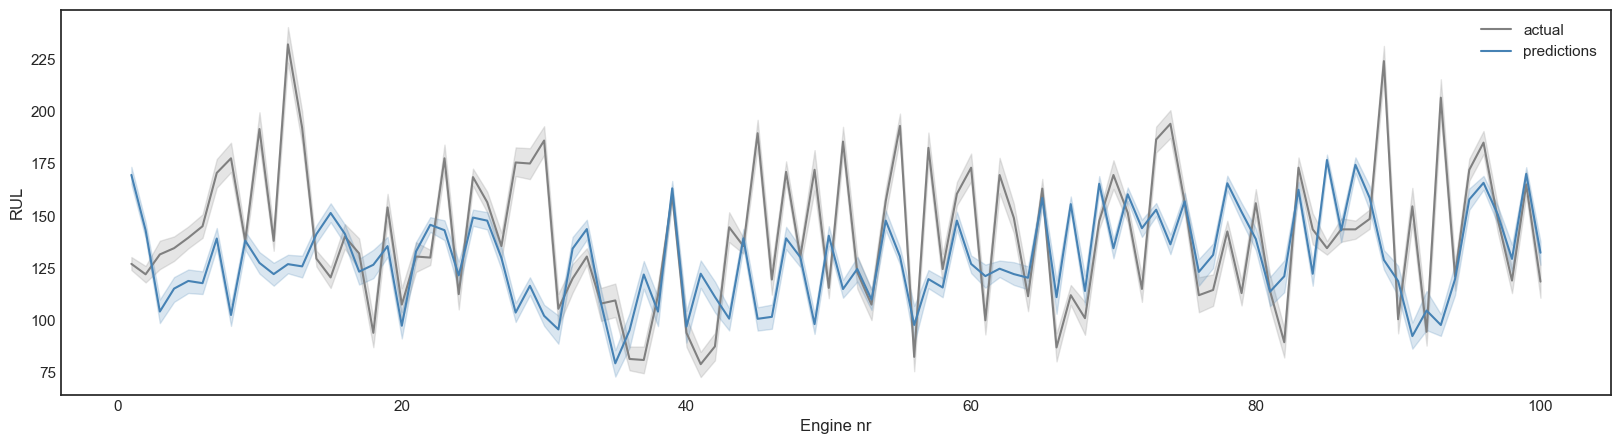

In [345]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=20,5 

fig,ax = plt.subplots()
plt.ylabel('RUL')
plt.xlabel('Engine nr')

g = sns.lineplot(x = df_test['Engine'],
                y=y_test,
                color='gray',
                label = 'actual',
                ax=ax)

f = sns.lineplot(x = df_test['Engine'],
                y=y_predictions,
                color='steelblue',
                label = 'predictions',
                ax=ax)
ax.legend()

LSTM Pythorch

In [346]:
pip install torch

Looking in indexes: http://pypi.tuna.tsinghua.edu.cn/simple/
Note: you may need to restart the kernel to use updated packages.


In [347]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from time import sleep
from os import listdir
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation as FA

📌 Splitting Train and Validation Sets: Out of the 100 engines in the training set, I will randomly take out 20 engines for validation.

In [348]:
n_features = len([c for c in df_train.columns[2:14]])
window = 20
print(f'number of features: {n_features}, window size: {window}')

number of features: 12, window size: 20


In [349]:
np.random.seed(5)
units = np.arange(1,101)
train_units = list(np.random.choice(units, 80, replace = False))
val_units = list(set(units) - set(train_units))
print(val_units)

[8, 9, 16, 17, 28, 31, 45, 54, 62, 63, 66, 74, 76, 77, 78, 79, 81, 91, 93, 100]


📌 Prepare Training, Validation and Test Dataloaders.

For training process, I will take batches of 64.
For the validation process, I will take the entire validation set (all the windows avaiable). For the test process, I will take the LAST window of each engine's given trajectory, thus it will have exactly 100 X(size 20 window)s and 100 y(RUL)s.

In [350]:
train_data = df_train[df_train['Engine'].isin(train_units)].copy()
val_data = df_train[df_train['Engine'].isin(val_units)].copy()
train_indices = list(train_data[(train_data['RUL'] >= (window - 1)) & (train_data['Cycle'] > 10)].index)
val_indices = list(val_data[(val_data['RUL'] >= (window - 1)) & (val_data['Cycle'] > 10)].index)

In [351]:
class data(Dataset):
    
    def __init__(self, list_indices, df_train):
        
        self.indices = list_indices
        self.df_train = df_train
        
    def __len__(self):
        
        return len(self.indices)
    
    def __getitem__(self, idx):
        
        ind = self.indices[idx]
        X_ = self.df_train.iloc[ind : ind + 20, :].drop(['Cycle','Engine','RUL'], axis = 1).copy().to_numpy()
        y_ = self.df_train.iloc[ind + 19]['RUL']
        
        return X_, y_
    
torch.manual_seed(5)
    
train = data(train_indices, df_train)
val = data(val_indices, df_train)

trainloader = DataLoader(train, batch_size = 64, shuffle = True)
valloader = DataLoader(val, batch_size = len(val_indices), shuffle = True)

units = np.arange(1,101)

class test(Dataset):
    
    def __init__(self, units, df_test):
        
        self.units = units
        self.df_test = df_test
        
    def __len__(self):
        
        return len(self.units)
    
    def __getitem__(self, idx):
        
        n = self.units[idx]
        U = self.df_test[self.df_test['Engine'] == n].copy()
        X_ = U.reset_index().iloc[-20:,:].drop(['index','Cycle','Engine','RUL'], axis = 1).copy().to_numpy()
        y_ = U['RUL'].min()
        
        return X_, y_
    
test = test(units, df_test)
testloader = DataLoader(test, batch_size = 100)

In [352]:
df_train

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0           1      1                       0.183735   
1           1      2                       0.283133   
2           1      3                       0.343373   
3           1      4                       0.343373   
4           1      5                       0.349398   
...       ...    ...                            ...   
20626     100    196                       0.686747   
20627     100    197                       0.701807   
20628     100    198                       0.665663   
20629     100    199                       0.608434   
20630     100    200                       0.795181   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                           0.406802                       0.309757   
1                           0.453019                       0.352633   
2                           0.369523                       0.370527   
3                           0.256159                       0.331195   
4                           0.257467                       0.404625   
...                              ...                            ...   
20626                       0.587312                       0.782917   
20627                       0.729453                       0.866475   
20628                       0.684979                       0.775321   
20629                       0.746021                       0.747468   
20630                       0.639634                       0.842167   

       (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                          0.726248                    0.242424   
1                          0.628019                    0.212121   
2                          0.710145                    0.272727   
3                          0.740741                    0.318182   
4                          0.668277                    0.242424   
...                             ...                         ...   
20626                      0.254428                    0.439394   
20627                      0.162641                    0.500000   
20628                      0.175523                    0.515152   
20629                      0.133655                    0.530303   
20630                      0.151369                    0.545455   

       (HPC Outlet Static Pressure) (psia)  \
0                                 0.369048   
1                                 0.380952   
2                                 0.250000   
3                                 0.166667   
4                                 0.255952   
...                                    ...   
20626                             0.726190   
20627                             0.708333   
20628                             0.738095   
20629                             0.916667   
20630                             0.803571   

       (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                     0.633262                     0.205882   
1                                     0.765458                     0.279412   
2                                     0.795309                     0.220588   
3                                     0.889126                     0.294118   
4                                     0.746269                     0.235294   
...                                        ...                          ...   
20626                                 0.170576                     0.558824   
20627                                 0.211087                     0.500000   
20628                                 0.281450                     0.529412   
20629                                 0.208955                     0.514706   
20630                                 0.130064                     0.558824   

       (Bypass Ratio)   (Bleed Enthalpy)  \
0             0.363986          0.333333   
1             0.411312          0.333333   
2             0.357445          0.166667   
3         

In [353]:
df_test

Engine  Cycle  (LPC Outlet Temperature) (◦R)  \
0           1      1                       0.545181   
1           1      2                       0.150602   
2           1      3                       0.376506   
3           1      4                       0.370482   
4           1      5                       0.391566   
...       ...    ...                            ...   
13091     100    194                       0.611446   
13092     100    195                       0.605422   
13093     100    196                       0.671687   
13094     100    197                       0.617470   
13095     100    198                       0.524096   

       (HPC Outlet Temperature) (◦R)  (LPT Outlet Temperature) (◦R)  \
0                           0.310661                       0.269413   
1                           0.379551                       0.222316   
2                           0.346632                       0.322248   
3                           0.285154                       0.408001   
4                           0.352082                       0.332039   
...                              ...                            ...   
13091                       0.619359                       0.566172   
13092                       0.537388                       0.671843   
13093                       0.482014                       0.414754   
13094                       0.522128                       0.626435   
13095                       0.666667                       0.721472   

       (HPC Outlet Pressure) (psia)  (Physical Fan Speed) (rpm)  \
0                          0.652174                    0.212121   
1                          0.805153                    0.166667   
2                          0.685990                    0.227273   
3                          0.679549                    0.196970   
4                          0.694042                    0.166667   
...                             ...                         ...   
13091                      0.573269                    0.181818   
13092                      0.542673                    0.227273   
13093                      0.513688                    0.318182   
13094                      0.566828                    0.257576   
13095                      0.423510                    0.242424   

       (HPC Outlet Static Pressure) (psia)  \
0                                 0.208333   
1                                 0.386905   
2                                 0.386905   
3                                 0.255952   
4                                 0.273810   
...                                    ...   
13091                             0.500000   
13092                             0.446429   
13093                             0.428571   
13094                             0.452381   
13095                             0.565476   

       (Ratio of Fuel Flow to Ps30) (pps/psia)  (Corrected Fan Speed) (rpm)  \
0                                     0.646055                     0.220588   
1                                     0.739872                     0.264706   
2                                     0.699360                     0.220588   
3                                     0.573561                     0.250000   
4                                     0.737740                     0.220588   
...                                        ...                          ...   
13091                                 0.426439                     0.176471   
13092                                 0.503198                     0.308824   
13093                                 0.530917                     0.235294   
13094                                 0.562900                     0.294118   
13095                                 0.507463                     0.250000   

       (Bypass Ratio)   (Bleed Enthalpy)  \
0             0.308965          0.333333   
1             0.213159          0.416667   
2             0.458638          0.416667   
3         

## 2. Model Building and Training
📌 I will be using a LSTM Model, with some linear - relu layers before the final output.

In [354]:
device = 'cpu'

class LSTMRegressor(nn.Module):
    
    def __init__(self, n_features, hidden_units):
        super().__init__()
        self.n_features = n_features
        self.hidden_units = hidden_units
        self.n_layers = 1
        self.lstm = nn.LSTM(input_size = n_features, hidden_size = self.hidden_units, batch_first = True, num_layers = self.n_layers)
        self.linear1 = nn.Linear(in_features=self.hidden_units, out_features=12)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(in_features=12, out_features=12)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(in_features=12, out_features=1)
        
    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.n_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.n_layers, batch_size, self.hidden_units).requires_grad_()
        
        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear1(hn[0])
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out).flatten()
        
        return out
    
learning_rate = 0.001
n_hidden_units = 12

torch.manual_seed(15)

model = LSTMRegressor(n_features, n_hidden_units).to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
                             
ks = [key for key in model.state_dict().keys() if 'linear' in key and '.weight' in key]

for k in ks:
    nn.init.kaiming_uniform_(model.state_dict()[k])
    
bs = [key for key in model.state_dict().keys() if 'linear' in key and '.bias' in key]

for b in bs:
    nn.init.constant_(model.state_dict()[b], 0)

📌 Validation and Test Functions

In [355]:
def validation():
    model.eval()
    X, y = next(iter(valloader))
    X, y = X.to(device).to(torch.float32), y.to(device).to(torch.float32)
    
    with torch.no_grad():
        y_pred = model(X)
        val_loss = loss_fn(y_pred, y).item()
        
    return val_loss

loss_L1 = nn.L1Loss()
    
def test():
    model.eval()
    X, y = next(iter(testloader))
    X, y = X.to(device).to(torch.float32), y.to(device).to(torch.float32)
    
    with torch.no_grad():
        y_pred = model(X)
        test_loss_MSE = loss_fn(y_pred, y).item()
        test_loss_L1 = loss_L1(y_pred, y).item()
        
    return test_loss_MSE, test_loss_L1,  y_pred, y

In [356]:
T = []
V = []

epochs = 100

model.train()

for i in tqdm(range(epochs)):
    
    L = 0
    
    for batch, (X,y) in enumerate(trainloader):
        
        X, y = X.to(device).to(torch.float32), y.to(device).to(torch.float32)
        
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        L += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
     
    val_loss = validation()
    
    T.append(L/len(trainloader))
    V.append(val_loss)
    
    if (i+1) % 10 == 0:
        sleep(0.5)
        print(f'epoch:{i+1}, avg_train_loss:{L/len(trainloader)}, val_loss:{val_loss}')
        
        model.train()

 10%|████████                                                                         | 10/100 [01:44<16:17, 10.86s/it]

epoch:10, avg_train_loss:1253.0320356250863, val_loss:694.1605834960938


 20%|████████████████▏                                                                | 20/100 [03:39<15:34, 11.68s/it]

epoch:20, avg_train_loss:1153.0519923657444, val_loss:844.3900756835938


 30%|████████████████████████▎                                                        | 30/100 [05:40<14:24, 12.35s/it]

epoch:30, avg_train_loss:1136.6539059529262, val_loss:725.8837280273438


 40%|████████████████████████████████▍                                                | 40/100 [07:44<12:05, 12.08s/it]

epoch:40, avg_train_loss:1121.961224311221, val_loss:693.4615478515625


 50%|████████████████████████████████████████▌                                        | 50/100 [09:51<10:41, 12.83s/it]

epoch:50, avg_train_loss:1110.3146204315456, val_loss:736.4649658203125


 60%|████████████████████████████████████████████████▌                                | 60/100 [11:48<07:52, 11.82s/it]

epoch:60, avg_train_loss:1086.3664726324841, val_loss:823.1943359375


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [13:46<05:59, 11.99s/it]

epoch:70, avg_train_loss:1076.673416812863, val_loss:722.2249755859375


 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [15:48<04:05, 12.25s/it]

epoch:80, avg_train_loss:1074.012840878647, val_loss:715.9998779296875


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [17:33<01:42, 10.28s/it]

epoch:90, avg_train_loss:1048.1289973976338, val_loss:862.8563232421875


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [19:13<00:00, 11.54s/it]

epoch:100, avg_train_loss:1025.473195303858, val_loss:714.2139892578125


 Prediction on Test Set

In [360]:
mse, l1, y_pred, y = test()

print(f'Test MSE:{round(mse,2)}, L1:{round(l1,2)}')

Test MSE:747.08, L1:19.58


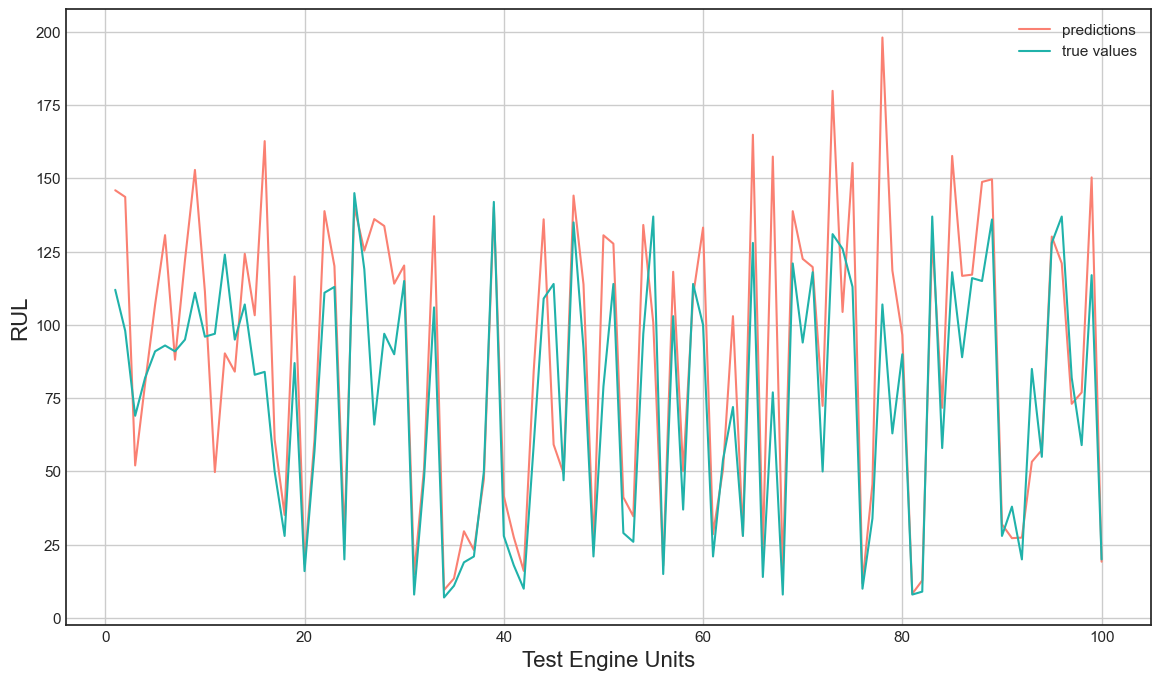

In [358]:
fig, ax = plt.subplots(figsize = (14,8))
ax.plot(np.arange(1,101), y_pred.detach().numpy(), label = 'predictions', c = 'salmon')
ax.plot(np.arange(1,101), y.detach().numpy(), label = 'true values', c = 'lightseagreen')
ax.set_xlabel('Test Engine Units', fontsize = 16)
ax.set_ylabel('RUL', fontsize = 16)
ax.grid(True)
ax.legend()
plt.show()